In [1]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 쌀 생산량 데이터

In [2]:
rice = pd.read_csv('./rice.csv')
rice.head()

,지역코드,연도,논벼:10a당 생산량 (kg)
0,95,2013,463.37520
1,95,2014,594.47970
2,95,2015,572.03241
3,95,2016,576.00834
4,95,2017,522.44254


In [3]:
rice['연도'].tail()

305    2018
306    2019
307    2020
308    2021
309    2022
Name: 연도, dtype: int64

In [4]:
rice.isnull().sum()

지역코드                0
연도                  0
논벼:10a당 생산량 (kg)    0
dtype: int64

In [5]:
#지역코드의 타입을 str로 변환
rice['지역코드']= rice['지역코드'].astype(str)
#논벼:10a당 생산량 (kg) 칼럼 명을 생산량으로 변경,변수명을 영어로 변환
rice = rice.rename(columns={'논벼:10a당 생산량 (kg)':'production','지역코드':'region','연도':'year'})
rice.dtypes

region         object
year            int64
production    float64
dtype: object

In [6]:
year = rice.groupby('year').size()
year

year
2013    31
2014    31
2015    31
2016    31
2017    31
2018    31
2019    31
2020    31
2021    31
2022    31
dtype: int64

/Users/nawon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

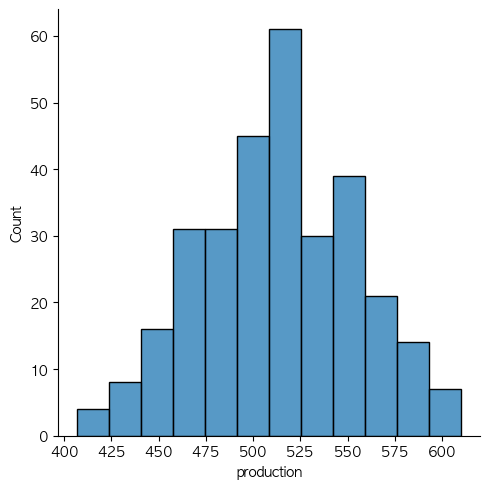

In [47]:
plt.figure(figsize=(10,5))
dist = sns.displot(rice['production'])
plt.show()

/Users/nawon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/nawon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/5k/75phq93d5xncv1gj0xfb88zc0000gn/T/ipykernel_41219/2996358351.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


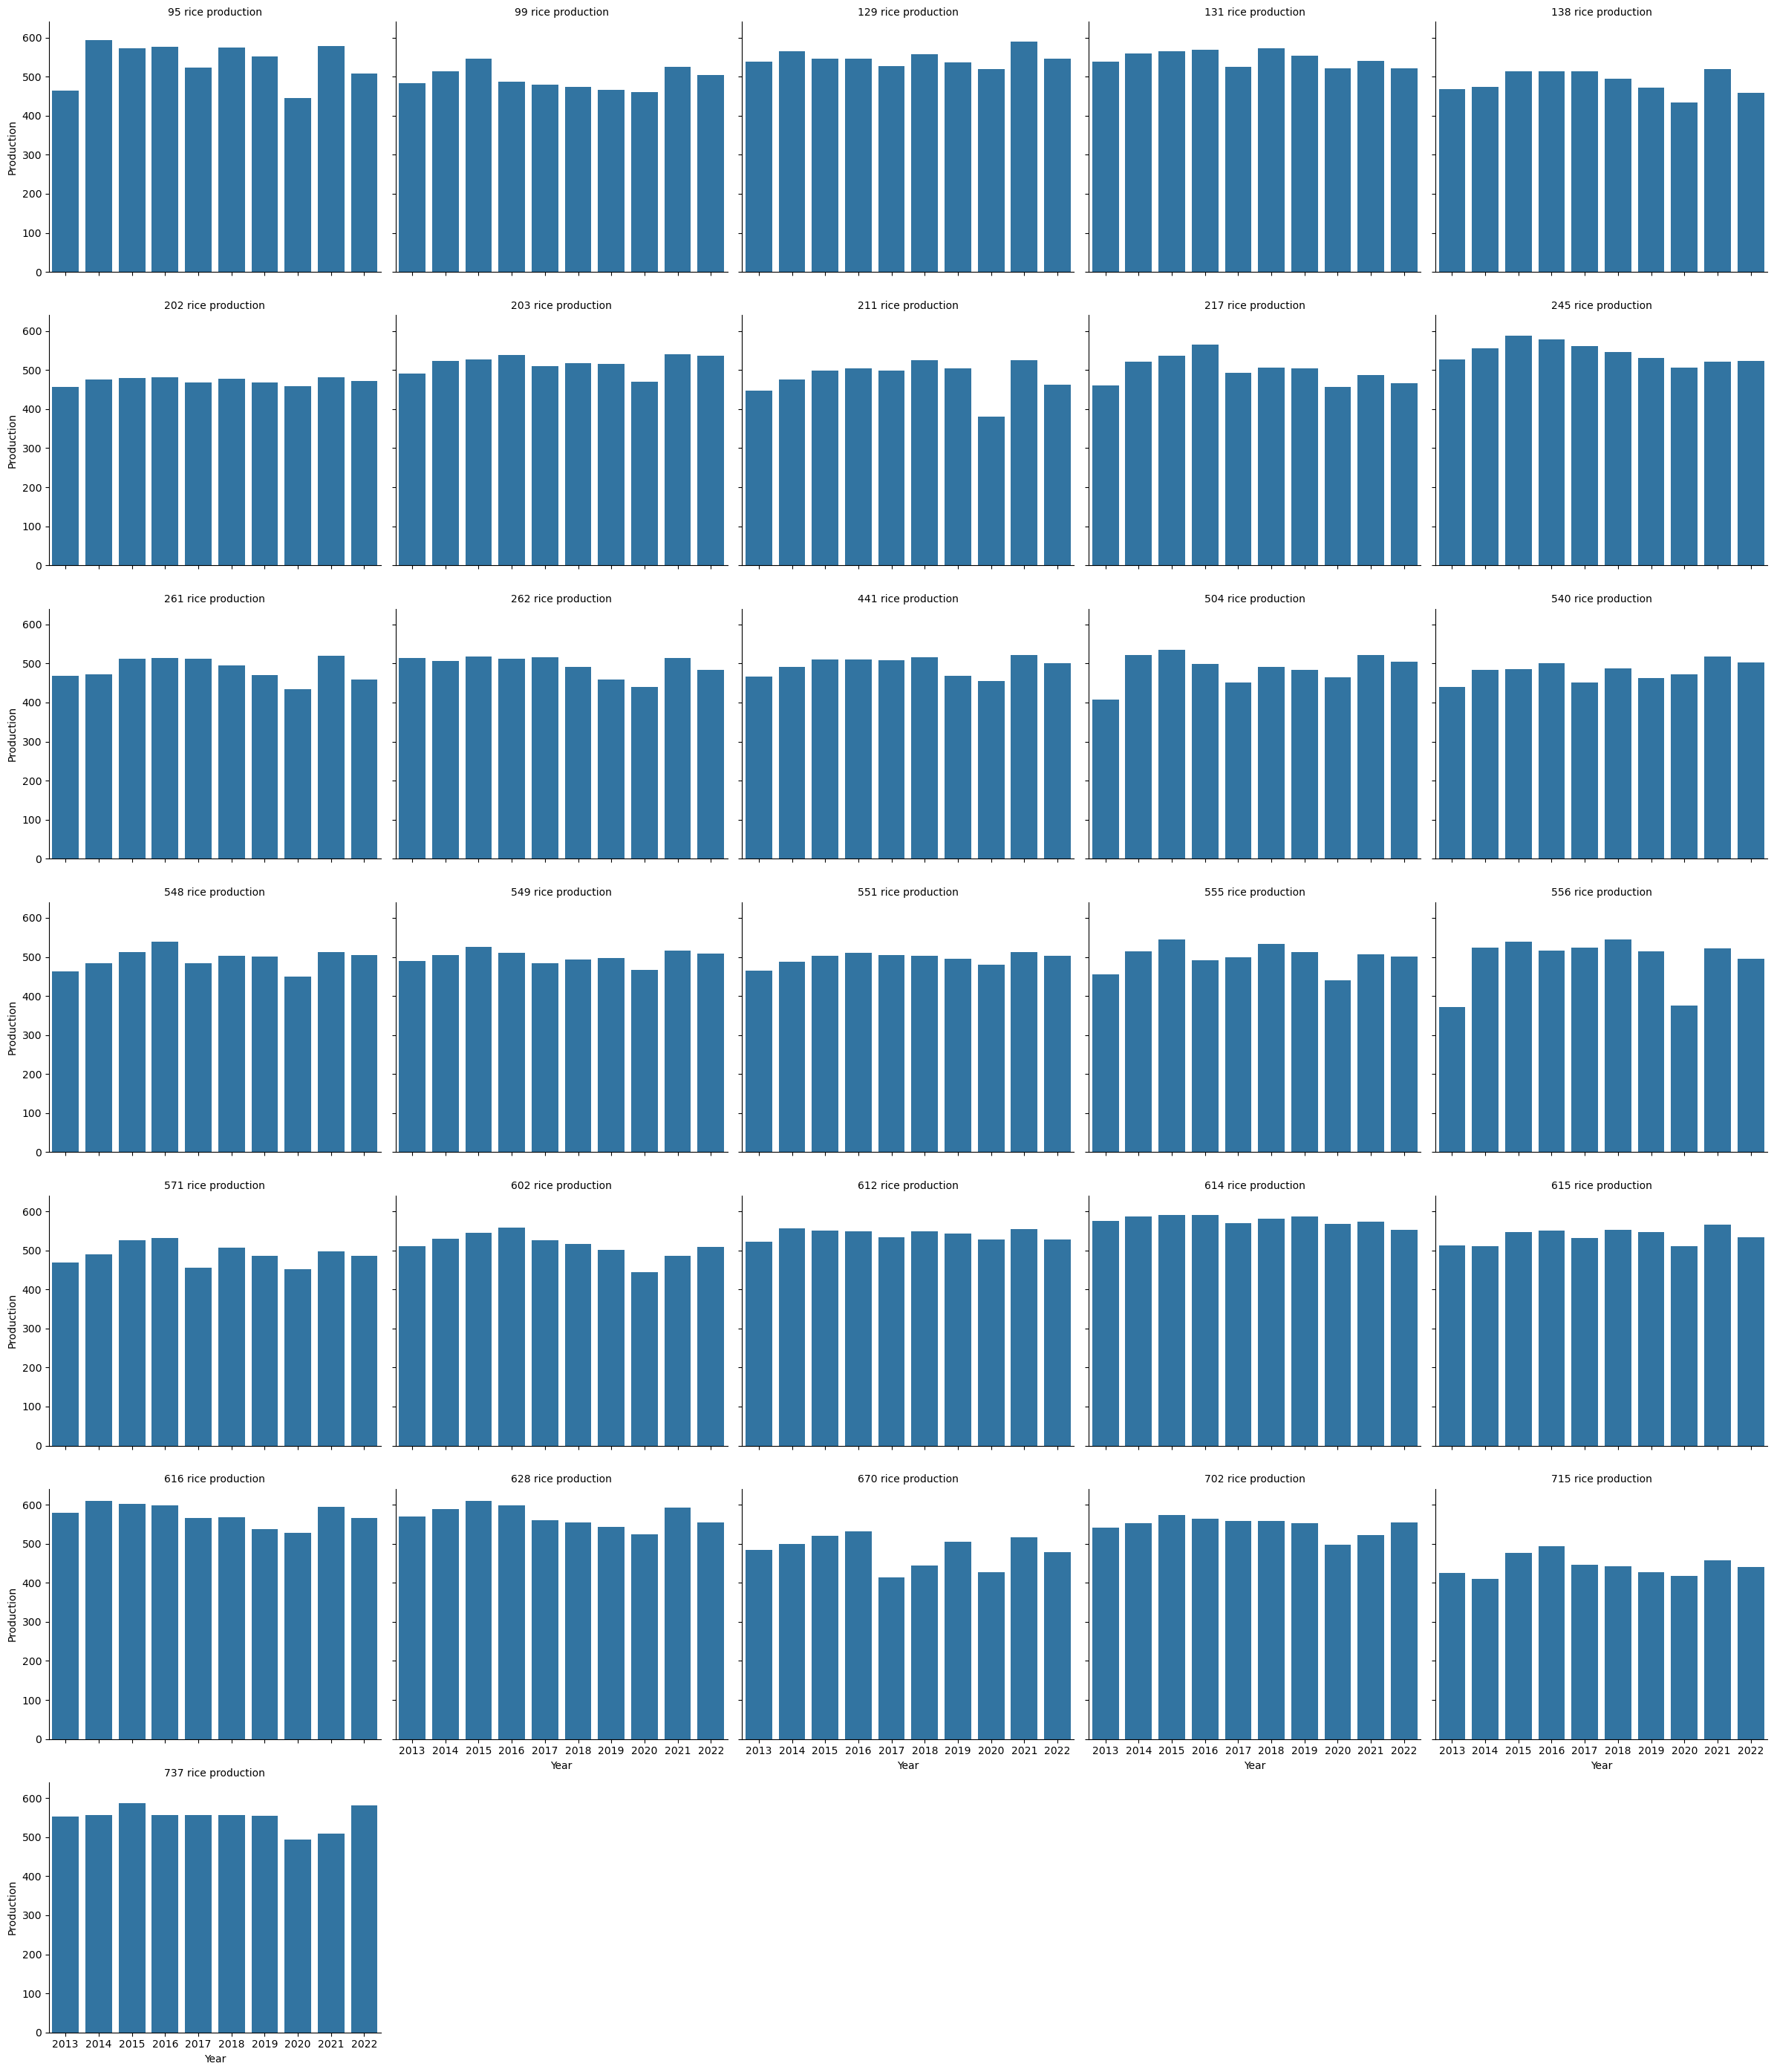

In [7]:
# 각 지역의 연도별 쌀 생산량 시각화
g = sns.FacetGrid(rice, col="region", col_wrap=5, height=4, aspect=1.2)
g.map(sns.barplot, "year", "production")
g.set_titles("{col_name} rice production")
g.set_xlabels("Year")
g.set_ylabels("Production")
plt.tight_layout()
plt.show()

/Users/nawon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45436 (\N{HANGUL SYLLABLE NON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nawon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48316 (\N{HANGUL SYLLABLE BYEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nawon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nawon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nawon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.prin

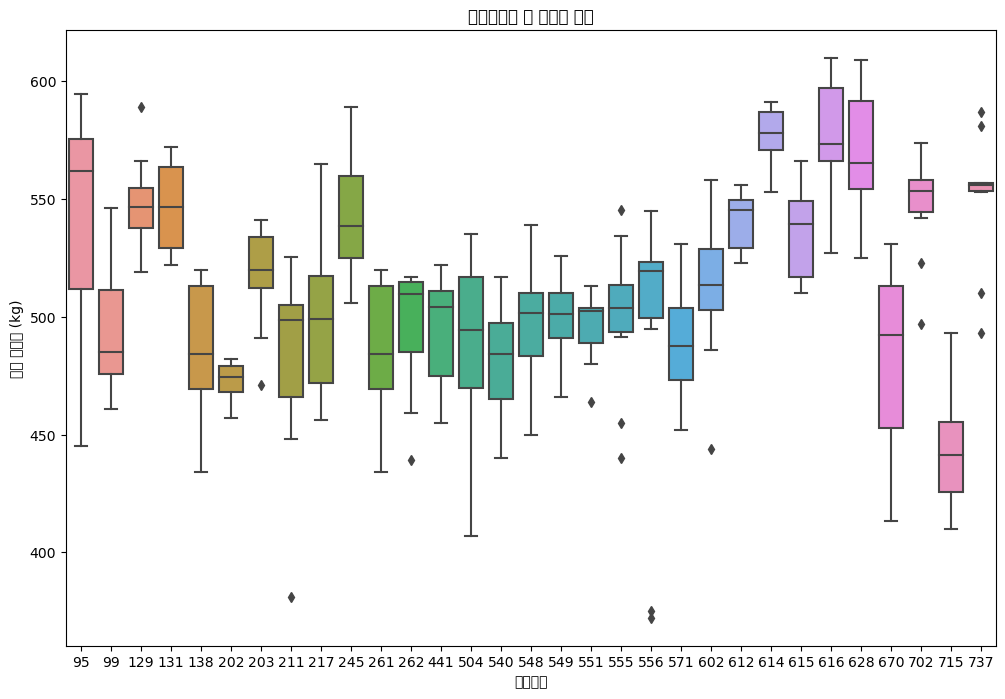

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(rice, x='region', y='production')
plt.xlabel('지역코드')
plt.ylabel('논벼 생산량 (kg)')
plt.title('지역코드별 벼 생산량 분포')
plt.show()

In [9]:
from scipy import stats
import numpy as np

# 생산량 열 선택
production_column = rice['production']

# Z-score 계산
z_scores = np.abs(stats.zscore(production_column))

# 임계값 설정
threshold = 3

# 이상치 식별
outliers = z_scores > threshold

# 이상치를 포함하는 행만 선택하여 출력
outlier_rows = rice[outliers]

# 결과 출력
print(outlier_rows)

    region  year  production
77     211  2020   381.10900
190    556  2013   372.21136
197    556  2020   375.05266


In [10]:
#3개의 이상치만 존재하기 때문에 모델에 큰 영향을 미치지 않을 것으로 판단 -> 제거
#이상치 제거

# 제거하는게 맞을까요..? ㅜㅠ 의견이 필요합니다
# 찾아보니 2020년에는 태풍과 유래 없는 장마가 있었다는 기록이 있고, 2013년에도 중부 지방 역대 가장 긴 장마가 있었던 것으로 기록이 되었습니다...
rice = rice[~outliers]

In [11]:
#다시 이상치 확인
# 생산량 열 선택
production_column = rice['production']

# Z-score 계산
z_scores = np.abs(stats.zscore(production_column))

# 임계값 설정
threshold = 3

# 이상치 식별
outliers = z_scores > threshold

# 이상치를 포함하는 행만 선택하여 출력
outlier_rows = rice[outliers]

# 결과 출력
print(outlier_rows)

Empty DataFrame
Columns: [region, year, production]
Index: []


# 기후 데이터

In [12]:
climates = pd.read_csv('./climates.csv')
climates.sample(10)

,지역코드,일시,평균기온(℃),평균최고기온(℃),평균최저기온(℃),평균상대습도(%),강수량(mm),평균풍속(m/s),합계 일조시간(hr),평균지면온도(°C)
2700,612,\t\t\t2017-10,14.3,20.9,11.5,76.5,26.5,1.1,176.0,16.3
784,203,\t\t\t2018-02,-2.5,4.1,-9.1,46.0,33.4,1.7,198.0,-1.0
3662,737,\t\t\t2017-12,0.6,5.0,-3.3,64.0,38.0,1.8,161.9,1.5
1826,548,\t\t\t2014-12,-4.0,0.7,-8.2,58.0,11.5,1.6,180.0,-1.0
1921,549,\t\t\t2012-11,4.4,9.8,-0.3,71.0,49.8,1.4,167.6,5.1
2313,556,\t\t\t2015-07,23.3,29.0,19.2,77.0,268.5,1.5,171.3,25.2
1934,549,\t\t\t2013-12,-1.2,4.1,-5.9,73.0,28.7,1.2,168.0,0.9
2077,551,\t\t\t2015-11,9.4,13.3,5.8,80.0,127.0,1.7,100.0,9.3
1680,540,\t\t\t2012-10,13.3,20.3,7.5,58.0,82.0,1.2,235.4,16.2
365,131,\t\t\t2013-03,6.4,13.3,0.6,53.0,46.8,1.5,247.2,7.0


In [13]:
climates['일시'] = climates['일시'].str.strip()

In [14]:
climates.sample(10)

,지역코드,일시,평균기온(℃),평균최고기온(℃),평균최저기온(℃),평균상대습도(%),강수량(mm),평균풍속(m/s),합계 일조시간(hr),평균지면온도(°C)
2614,602,2020-08,26.2,30.9,22.9,85.2,542.0,1.7,119.8,27.5
605,202,2013-03,5.2,12.3,-1.0,58.0,50.6,1.8,232.3,6.6
1258,261,2017-08,26.6,22.2,31.8,78.0,198.9,2.2,234.0,31.7
1124,245,2016-06,23.0,28.4,18.9,76.0,51.7,1.4,198.4,26.2
997,217,2015-11,7.6,11.5,4.5,74.0,134.0,1.4,63.6,8.4
1982,549,2017-12,-2.4,2.8,-7.3,62.0,32.0,1.4,180.9,-1.4
1011,217,2017-01,-3.1,2.7,-8.2,58.0,15.8,1.9,166.3,-1.1
1305,261,2021-07,26.3,22.6,30.5,82.0,500.7,2.3,204.5,30.3
641,202,2016-03,6.5,13.3,0.0,55.0,24.5,1.5,218.2,8.1
1059,217,2021-01,-4.3,1.8,-9.7,58.0,14.5,2.2,134.6,-3.5


In [15]:
climates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역코드         3720 non-null   int64  
 1   일시           3720 non-null   object 
 2   평균기온(℃)      3707 non-null   float64
 3   평균최고기온(℃)    3705 non-null   float64
 4   평균최저기온(℃)    3706 non-null   float64
 5   평균상대습도(%)    3713 non-null   float64
 6   강수량(mm)      3720 non-null   float64
 7   평균풍속(m/s)    3695 non-null   float64
 8   합계 일조시간(hr)  3719 non-null   float64
 9   평균지면온도(°C)   3717 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 290.8+ KB


In [16]:
climates['지역코드']= climates['지역코드'].astype(str)
climates.dtypes

지역코드            object
일시              object
평균기온(℃)        float64
평균최고기온(℃)      float64
평균최저기온(℃)      float64
평균상대습도(%)      float64
강수량(mm)        float64
평균풍속(m/s)      float64
합계 일조시간(hr)    float64
평균지면온도(°C)     float64
dtype: object

In [17]:
climates.count()

지역코드           3720
일시             3720
평균기온(℃)        3707
평균최고기온(℃)      3705
평균최저기온(℃)      3706
평균상대습도(%)      3713
강수량(mm)        3720
평균풍속(m/s)      3695
합계 일조시간(hr)    3719
평균지면온도(°C)     3717
dtype: int64

In [18]:
climates.describe()

,평균기온(℃),평균최고기온(℃),평균최저기온(℃),평균상대습도(%),강수량(mm),평균풍속(m/s),합계 일조시간(hr),평균지면온도(°C)
count,3707.000000,3705.000000,3706.000000,3713.000000,3720.000000,3695.000000,3719.000000,3717.000000
mean,12.441462,17.619190,8.085672,69.540749,96.008199,1.629770,193.983490,14.808071
std,9.727797,9.873226,10.541971,10.003152,110.835824,0.502162,44.660003,10.595721
min,-8.800000,-6.000000,-15.700000,35.000000,0.000000,0.500000,28.400000,-4.700000
25%,4.000000,8.400000,-1.100000,62.000000,25.500000,1.300000,164.250000,5.100000
50%,13.100000,19.500000,8.100000,70.600000,61.000000,1.600000,193.100000,15.500000
75%,21.500000,26.700000,17.300000,77.000000,122.075000,1.900000,222.700000,24.900000
max,28.900000,33.800000,33.400000,96.000000,1009.200000,3.800000,342.800000,36.600000


In [19]:
climates.isnull().sum() 

지역코드            0
일시              0
평균기온(℃)        13
평균최고기온(℃)      15
평균최저기온(℃)      14
평균상대습도(%)       7
강수량(mm)         0
평균풍속(m/s)      25
합계 일조시간(hr)     1
평균지면온도(°C)      3
dtype: int64

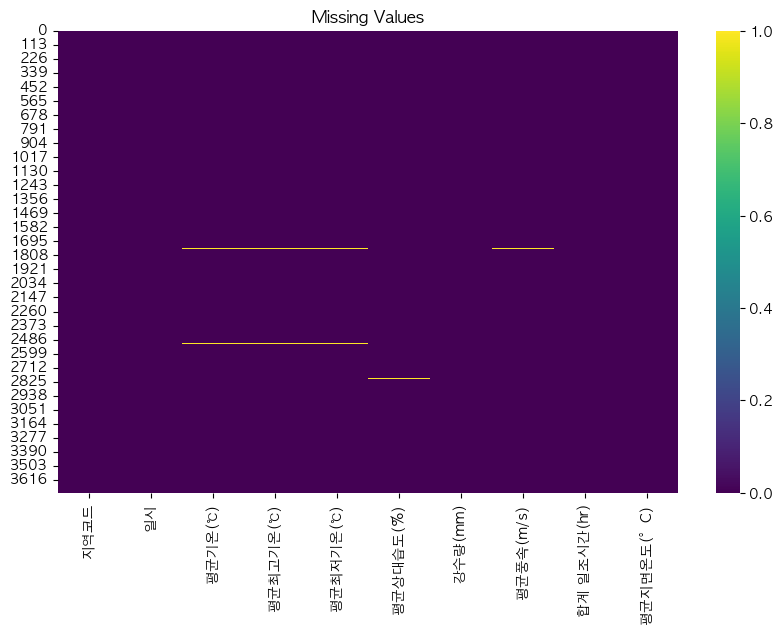

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sns.heatmap(climates.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values')
plt.show()

In [21]:
climates[climates['평균기온(℃)'].isna()].iloc[:,0:2]

,지역코드,일시
1665,504,2021-07
1733,540,2017-03
1753,540,2018-11
1771,540,2020-05
1976,549,2017-06
2038,549,2022-08
2133,551,2020-07
2167,555,2013-05
2168,555,2013-06
2518,571,2022-08


In [22]:
# 0을 결측치로 인식하는 것인지 확인 
zero_value_rows = climates[climates['평균기온(℃)'] == 0]
zero_value_rows

,지역코드,일시,평균기온(℃),평균최고기온(℃),평균최저기온(℃),평균상대습도(%),강수량(mm),평균풍속(m/s),합계 일조시간(hr),평균지면온도(°C)
88,95,2020-02,0.0,6.0,-5.4,79.0,46.8,1.1,180.2,2.4
364,131,2013-02,0.0,4.6,-4.0,55.0,33.2,1.3,161.5,1.5
472,131,2022-02,0.0,5.2,-4.3,49.0,2.4,1.6,222.9,2.2
1036,217,2019-02,0.0,6.6,-5.4,55.0,30.0,1.9,171.5,1.3
1155,245,2019-01,0.0,5.0,-4.2,76.0,16.9,1.5,189.5,-0.5
2138,551,2020-12,0.0,4.6,-4.5,65.0,2.0,1.9,208.2,0.0
2260,555,2021-02,0.0,8.4,-6.8,61.0,3.5,1.2,201.8,0.7
2414,571,2013-12,0.0,4.6,-4.2,73.0,23.0,1.4,168.0,0.9
2498,571,2020-12,0.0,4.8,-3.9,65.0,2.5,1.1,208.2,0.0
2560,602,2016-02,0.0,6.4,-5.8,61.7,50.0,1.5,174.5,1.9


In [23]:
climates[climates['평균최고기온(℃)'].isna()].iloc[:,0:2]

,지역코드,일시
1665,504,2021-07
1733,540,2017-03
1753,540,2018-11
1771,540,2020-05
1939,549,2014-05
1976,549,2017-06
2038,549,2022-08
2133,551,2020-07
2167,555,2013-05
2168,555,2013-06


In [24]:
climates[climates['평균최저기온(℃)'].isna()].iloc[:,0:2]

,지역코드,일시
1665,504,2021-07
1733,540,2017-03
1753,540,2018-11
1771,540,2020-05
1939,549,2014-05
1976,549,2017-06
2038,549,2022-08
2133,551,2020-07
2167,555,2013-05
2168,555,2013-06


In [25]:
climates[climates['평균상대습도(%)'].isna()].iloc[:,0:2]

,지역코드,일시
2610,602,2020-04
2682,612,2016-04
2795,614,2015-09
2796,614,2015-10
2797,614,2015-11
2798,614,2015-12
2799,614,2016-01


In [26]:
climates[climates['평균풍속(m/s)'].isna()].iloc[:,0:2]

,지역코드,일시
1160,245,2019-06
1297,261,2020-11
1452,441,2013-10
1454,441,2013-12
1458,441,2014-04
1459,441,2014-05
1461,441,2014-07
1478,441,2015-12
1665,504,2021-07
1733,540,2017-03


In [27]:
climates[climates['합계 일조시간(hr)'].isna()].iloc[:,0:2]

,지역코드,일시
981,217,2014-07


In [28]:
climates[climates['평균지면온도(°C)'].isna()].iloc[:,0:2]


,지역코드,일시
2181,555,2014-07
2253,555,2020-07
3584,715,2021-06


In [29]:
# 앞의 데이터로 결측치 대체
climates.fillna(method='ffill',inplace=True)
climates.isnull().sum()

지역코드           0
일시             0
평균기온(℃)        0
평균최고기온(℃)      0
평균최저기온(℃)      0
평균상대습도(%)      0
강수량(mm)        0
평균풍속(m/s)      0
합계 일조시간(hr)    0
평균지면온도(°C)     0
dtype: int64

## 연도별 연속형 자료 시각화

### 연도별 평균 기온 확인

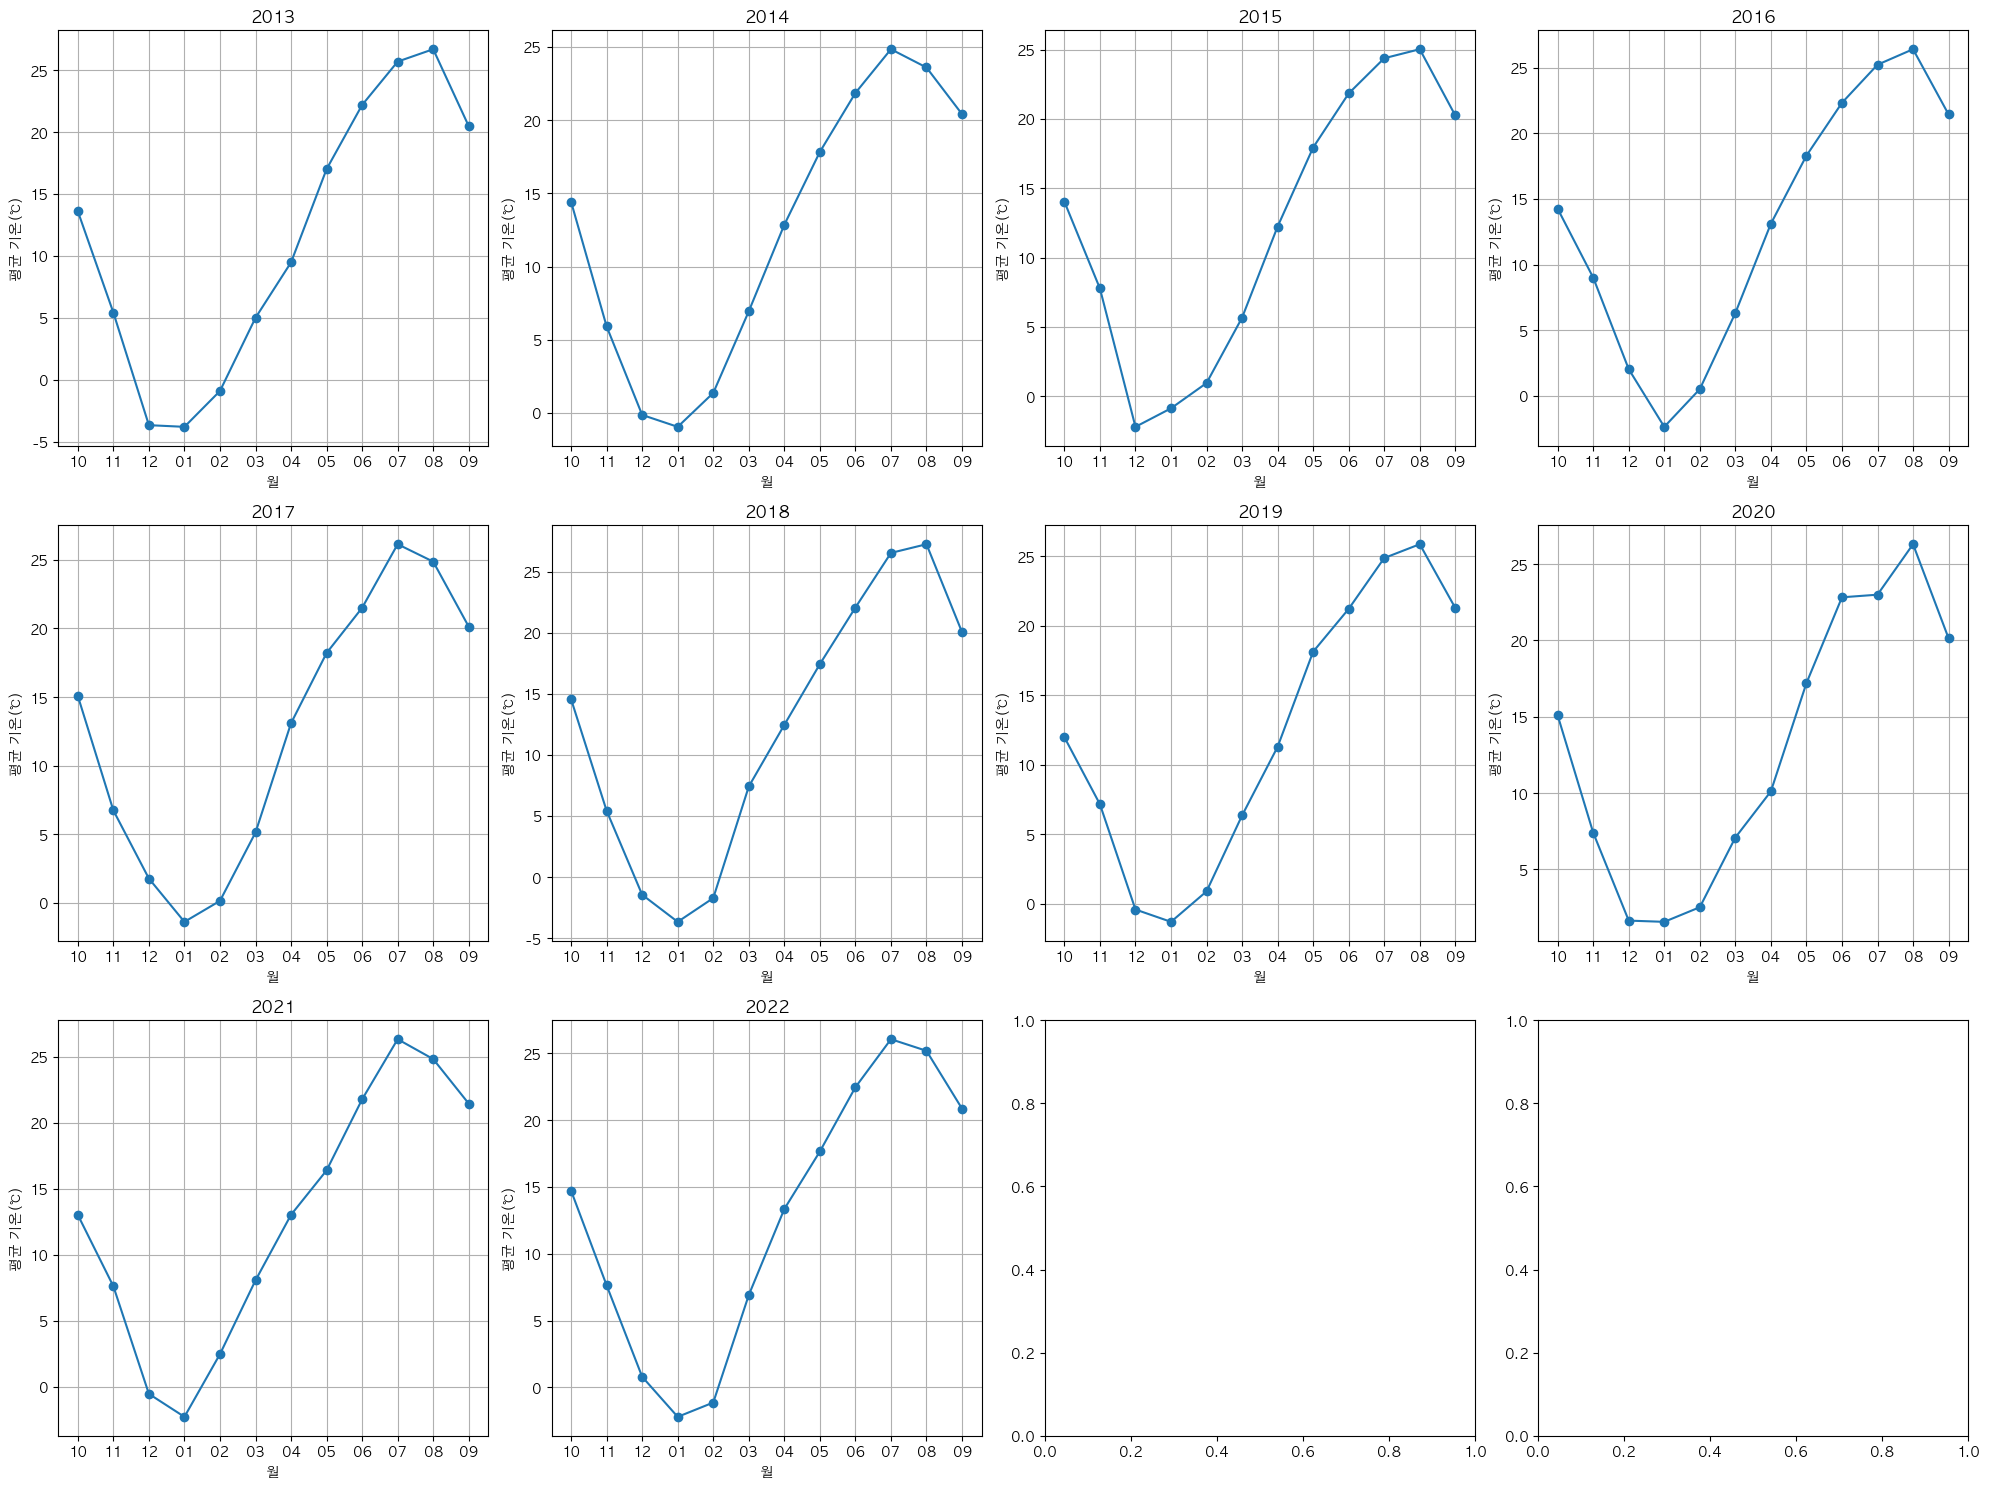

In [30]:
# 데이터 프레임에 연도와 월을 분리
climates['연도'] = climates['일시'].str.split('-').str[0]
climates['월'] = climates['일시'].str.split('-').str[1]

# 연도와 월을 기준으로 데이터를 그룹화하고 평균 기온 계산
monthly_avg_temp = climates.groupby(['연도', '월'])['평균기온(℃)'].mean().reset_index()

# 3x5 그리드로 나타내기 위한 subplot 생성
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# 연도별로 그래프 그리기
for i, ax in enumerate(axes.flat):
    if i < len(monthly_avg_temp['연도'].unique()) - 1:  # 2012년 제외
        year = monthly_avg_temp['연도'].unique()[i + 1]  # 2013년부터 시작
        temp_data = monthly_avg_temp[(monthly_avg_temp['연도'] == str(int(year)-1)) & 
                                      (monthly_avg_temp['월'].isin(['10', '11', '12']))]
        temp_data = pd.concat([temp_data, 
                               monthly_avg_temp[(monthly_avg_temp['연도'] == year) & 
                                                (monthly_avg_temp['월'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09']))]])
        temp_data.sort_values(by=['연도', '월'], inplace=True)
        ax.plot(temp_data['월'], temp_data['평균기온(℃)'], marker='o')
        ax.set_title(str(year))
        ax.set_xlabel('월')
        ax.set_ylabel('평균 기온(℃)')
        ax.grid(True)

# 그래프 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

### 연도별 평균 상대습도 확인

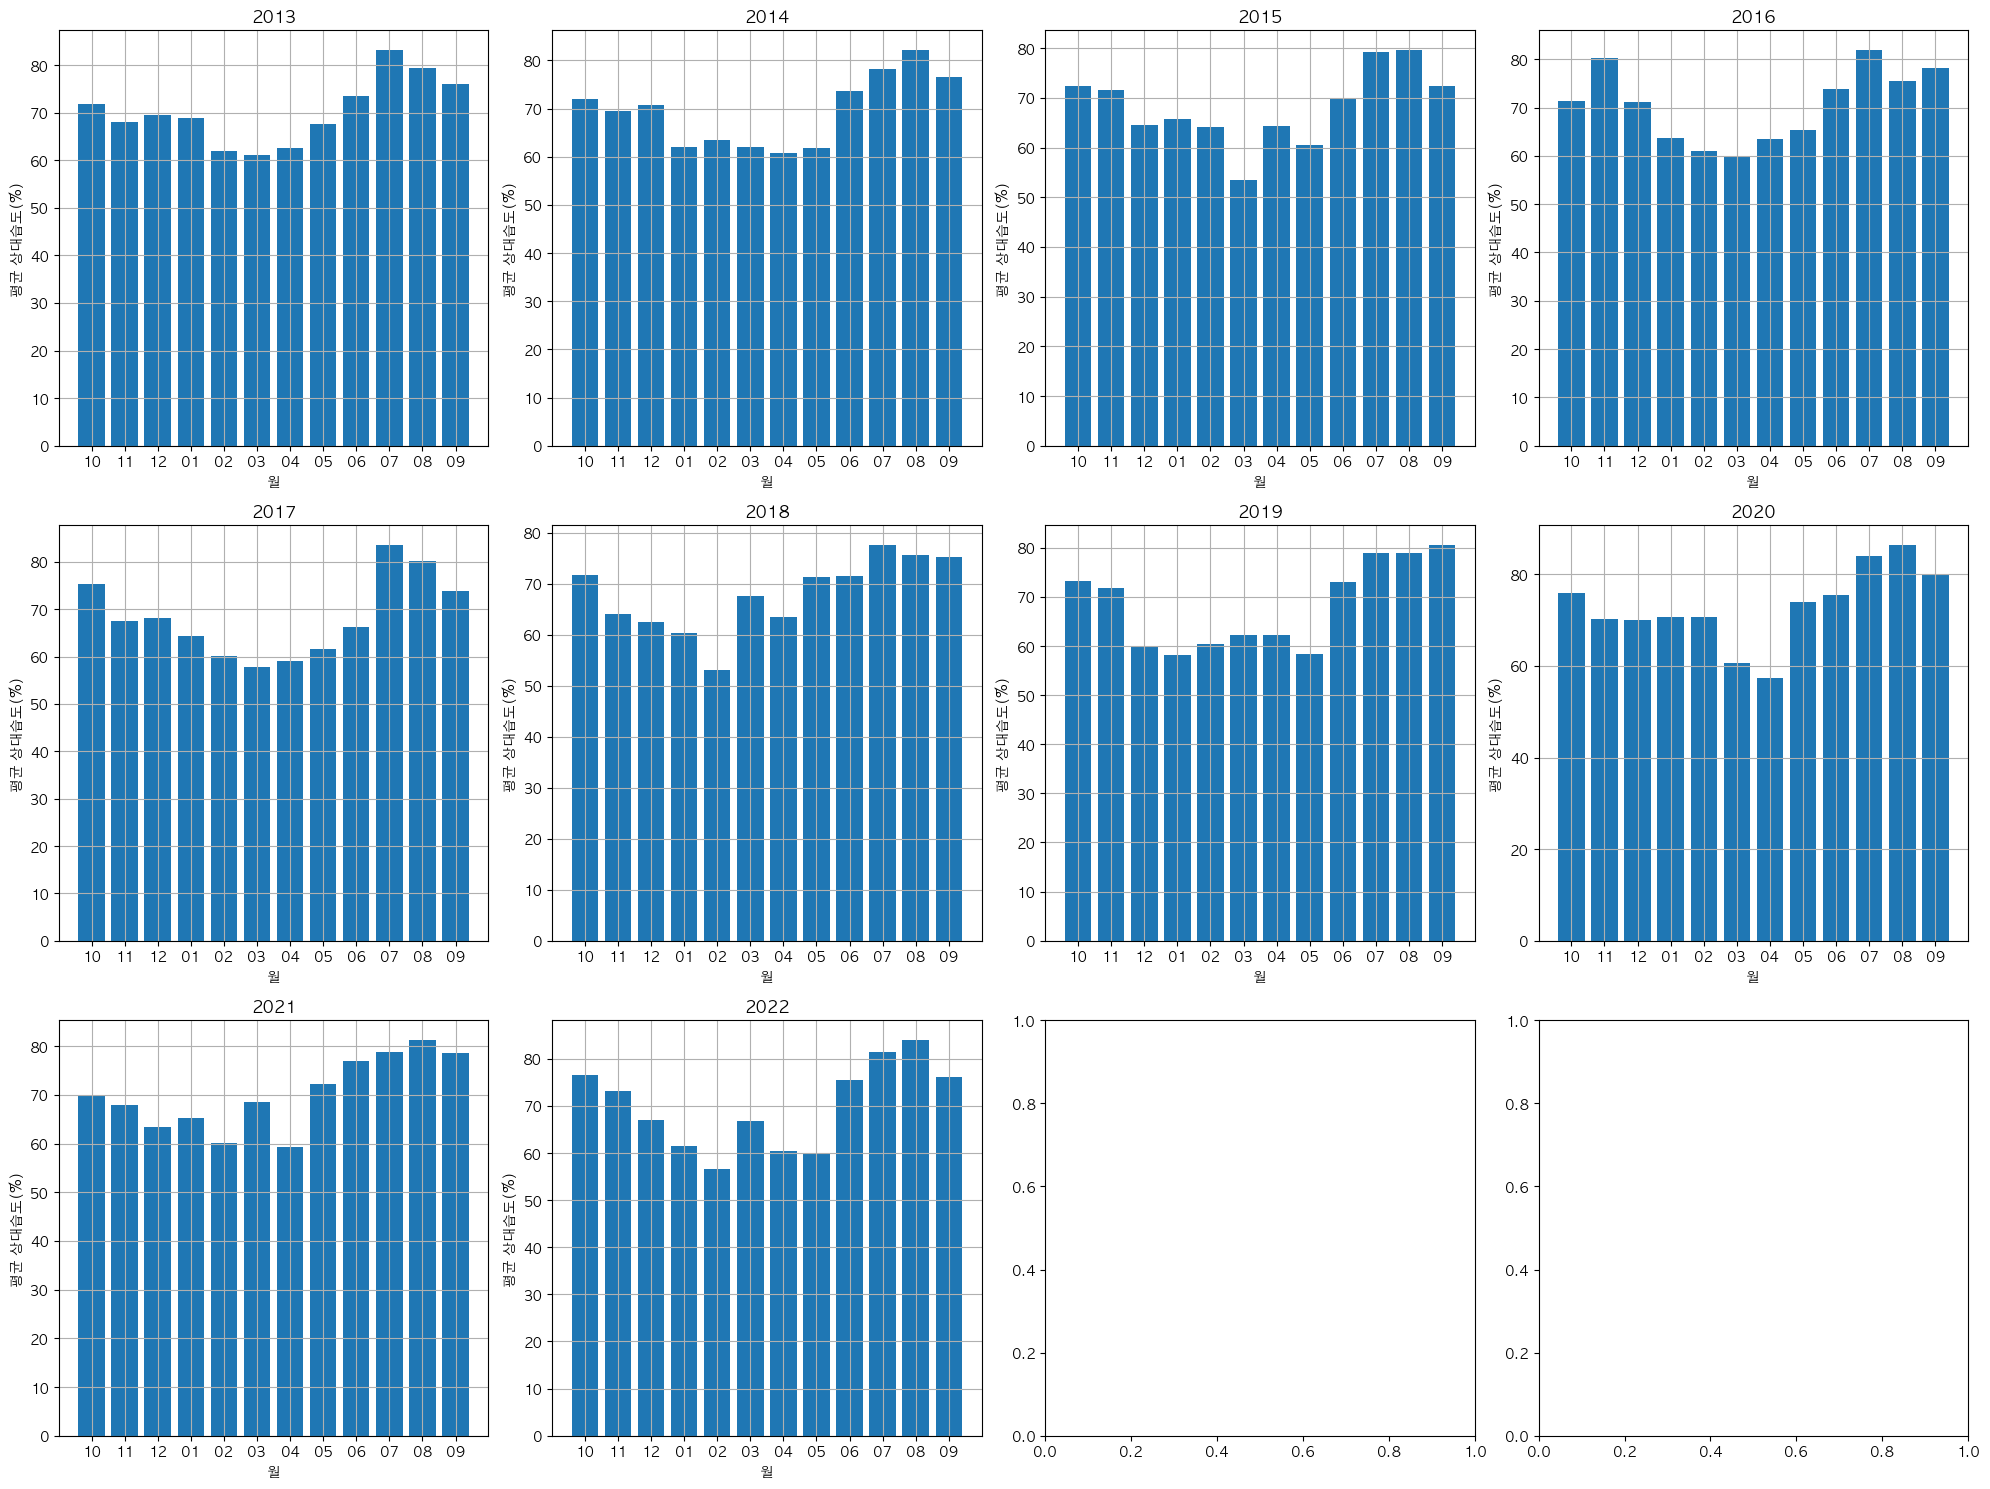

In [31]:
# 상대습도 그룹화 후 계산
avg_humidity = climates.groupby(['연도', '월'])['평균상대습도(%)'].mean().reset_index()

# 위의 그래프와 같은 로직
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, ax in enumerate(axes.flat):
    if i < len(avg_humidity['연도'].unique()) - 1:  # 2012년 제외
        year = avg_humidity['연도'].unique()[i + 1]  # 2013년부터 시작
        humidity = avg_humidity[(avg_humidity['연도'] == str(int(year)-1)) & 
                                      (avg_humidity['월'].isin(['10', '11', '12']))]
        humidity = pd.concat([humidity, 
                               avg_humidity[(avg_humidity['연도'] == year) & 
                                                (avg_humidity['월'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09']))]])
        humidity.sort_values(by=['연도', '월'], inplace=True)
        ax.bar(humidity['월'], humidity['평균상대습도(%)'])
        ax.set_title(str(year))
        ax.set_xlabel('월')
        ax.set_ylabel('평균 상대습도(%)')
        ax.grid(True)

plt.tight_layout()
plt.show()

### 연도별 평균 강수량 확인

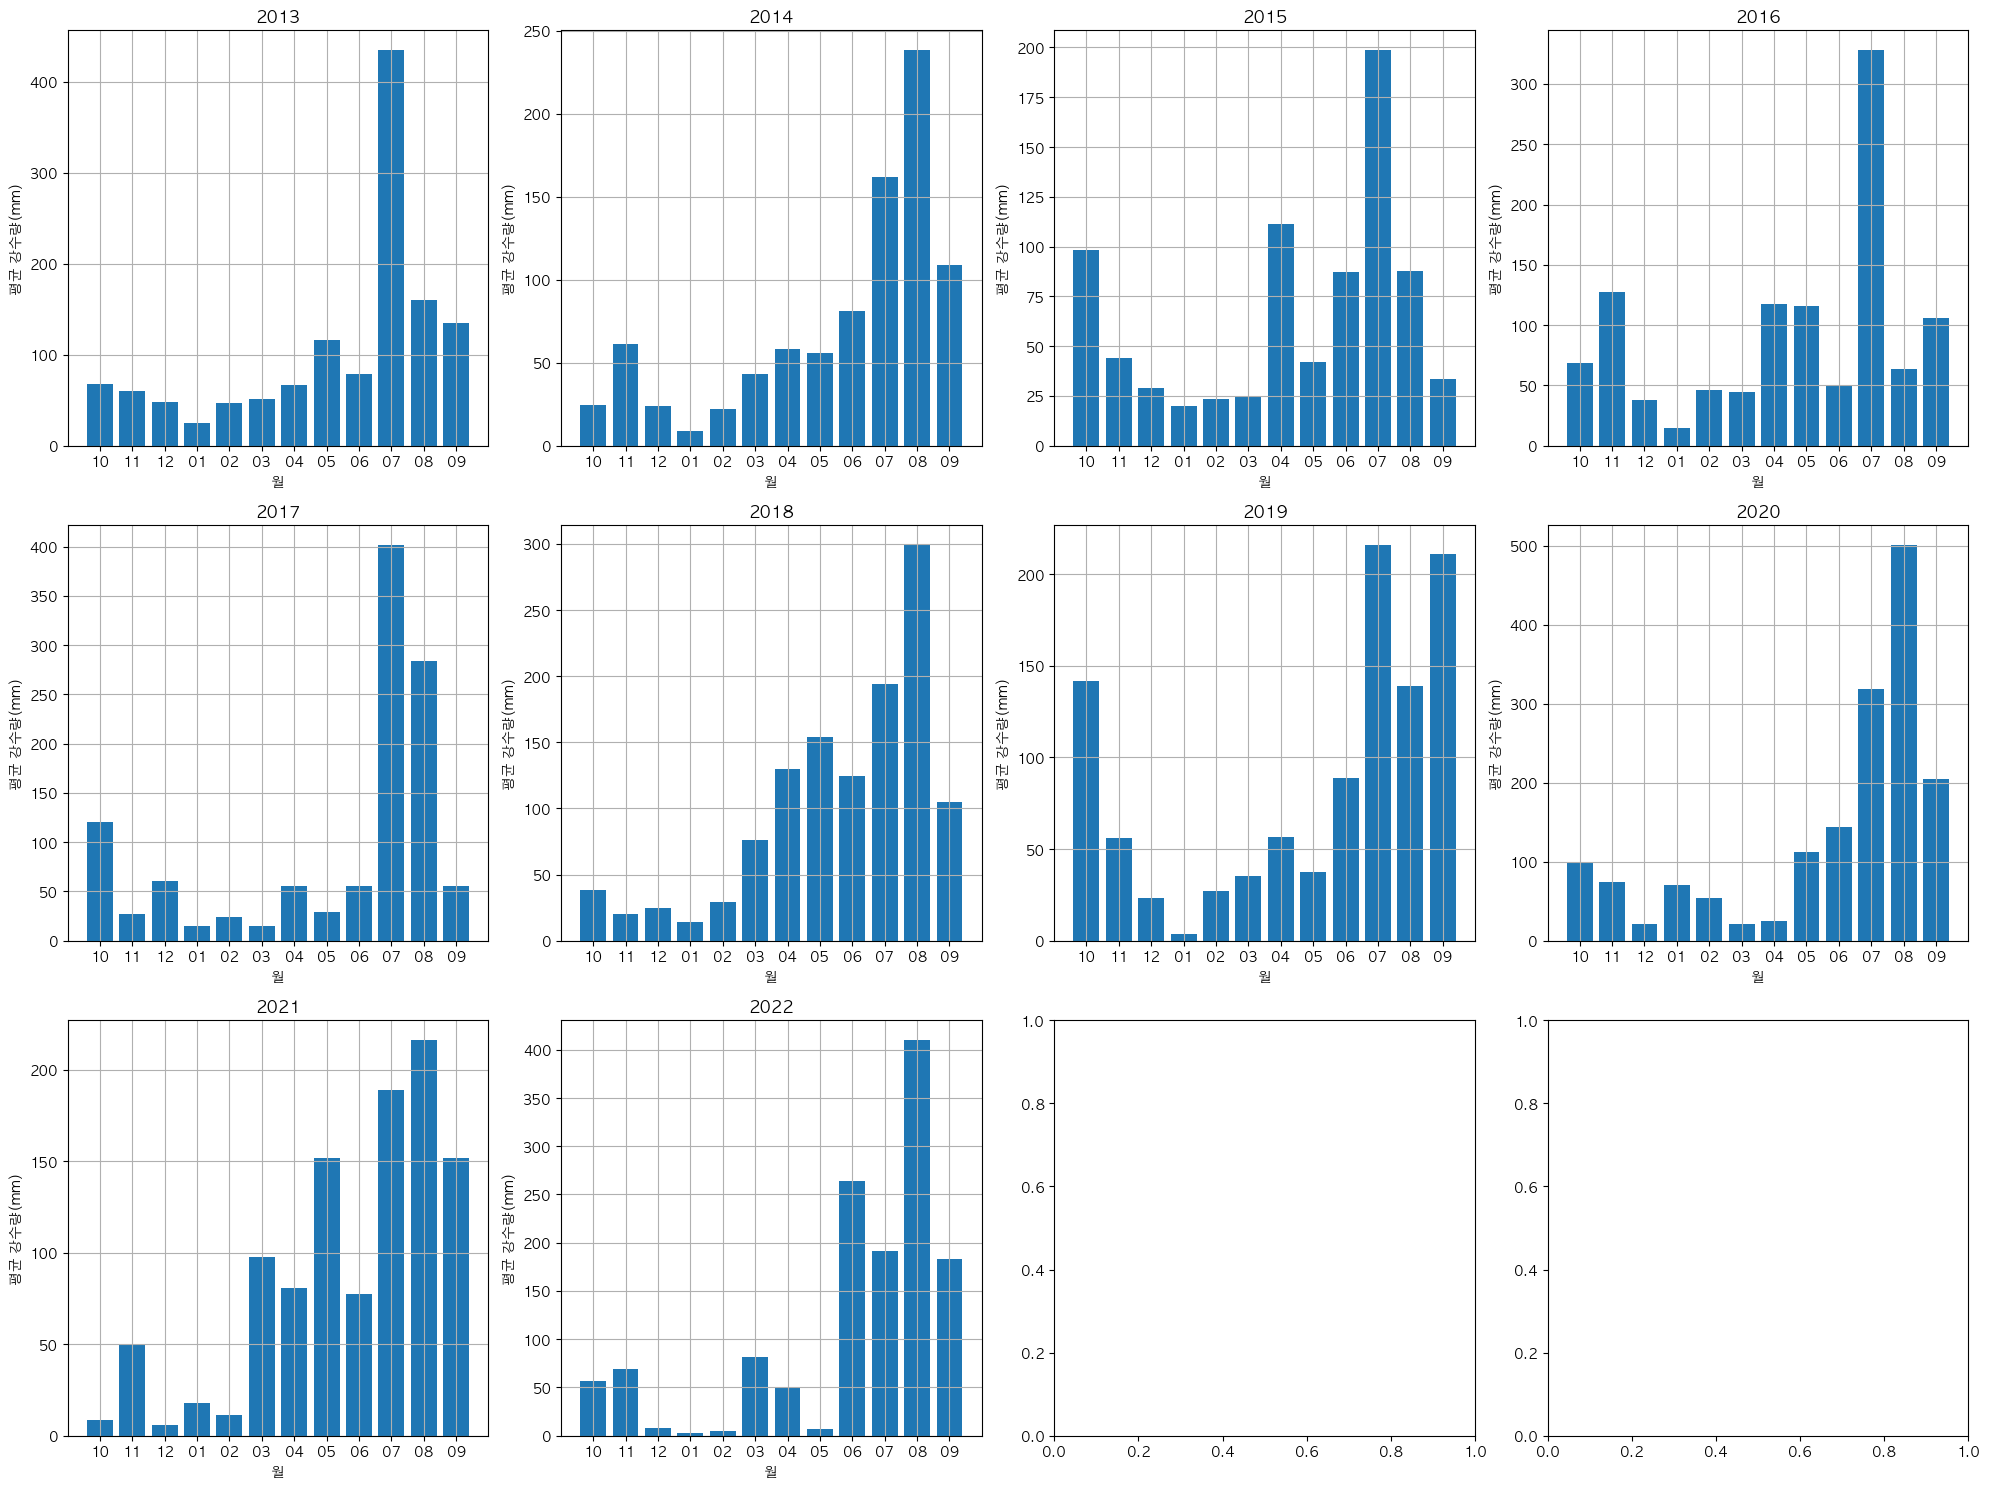

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 강수량 그룹화 후 계산
avg_rain = climates.groupby(['연도', '월'])['강수량(mm)'].mean().reset_index()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, ax in enumerate(axes.flat):
    if i < len(avg_rain['연도'].unique()) - 1:  
        year = avg_rain['연도'].unique()[i + 1]  
        rain = avg_rain[(avg_rain['연도'] == str(int(year)-1)) & 
                                      (avg_rain['월'].isin(['10', '11', '12']))]
        rain = pd.concat([rain, 
                               avg_rain[(avg_rain['연도'] == year) & 
                                                (avg_rain['월'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09']))]])
        rain.sort_values(by=['연도', '월'], inplace=True)
        ax.bar(rain['월'], rain['강수량(mm)'])
        ax.set_title(str(year))
        ax.set_xlabel('월')
        ax.set_ylabel('평균 강수량(mm)')
        ax.grid(True)


plt.tight_layout()
plt.show()

### 연도별 평균 풍속 확인

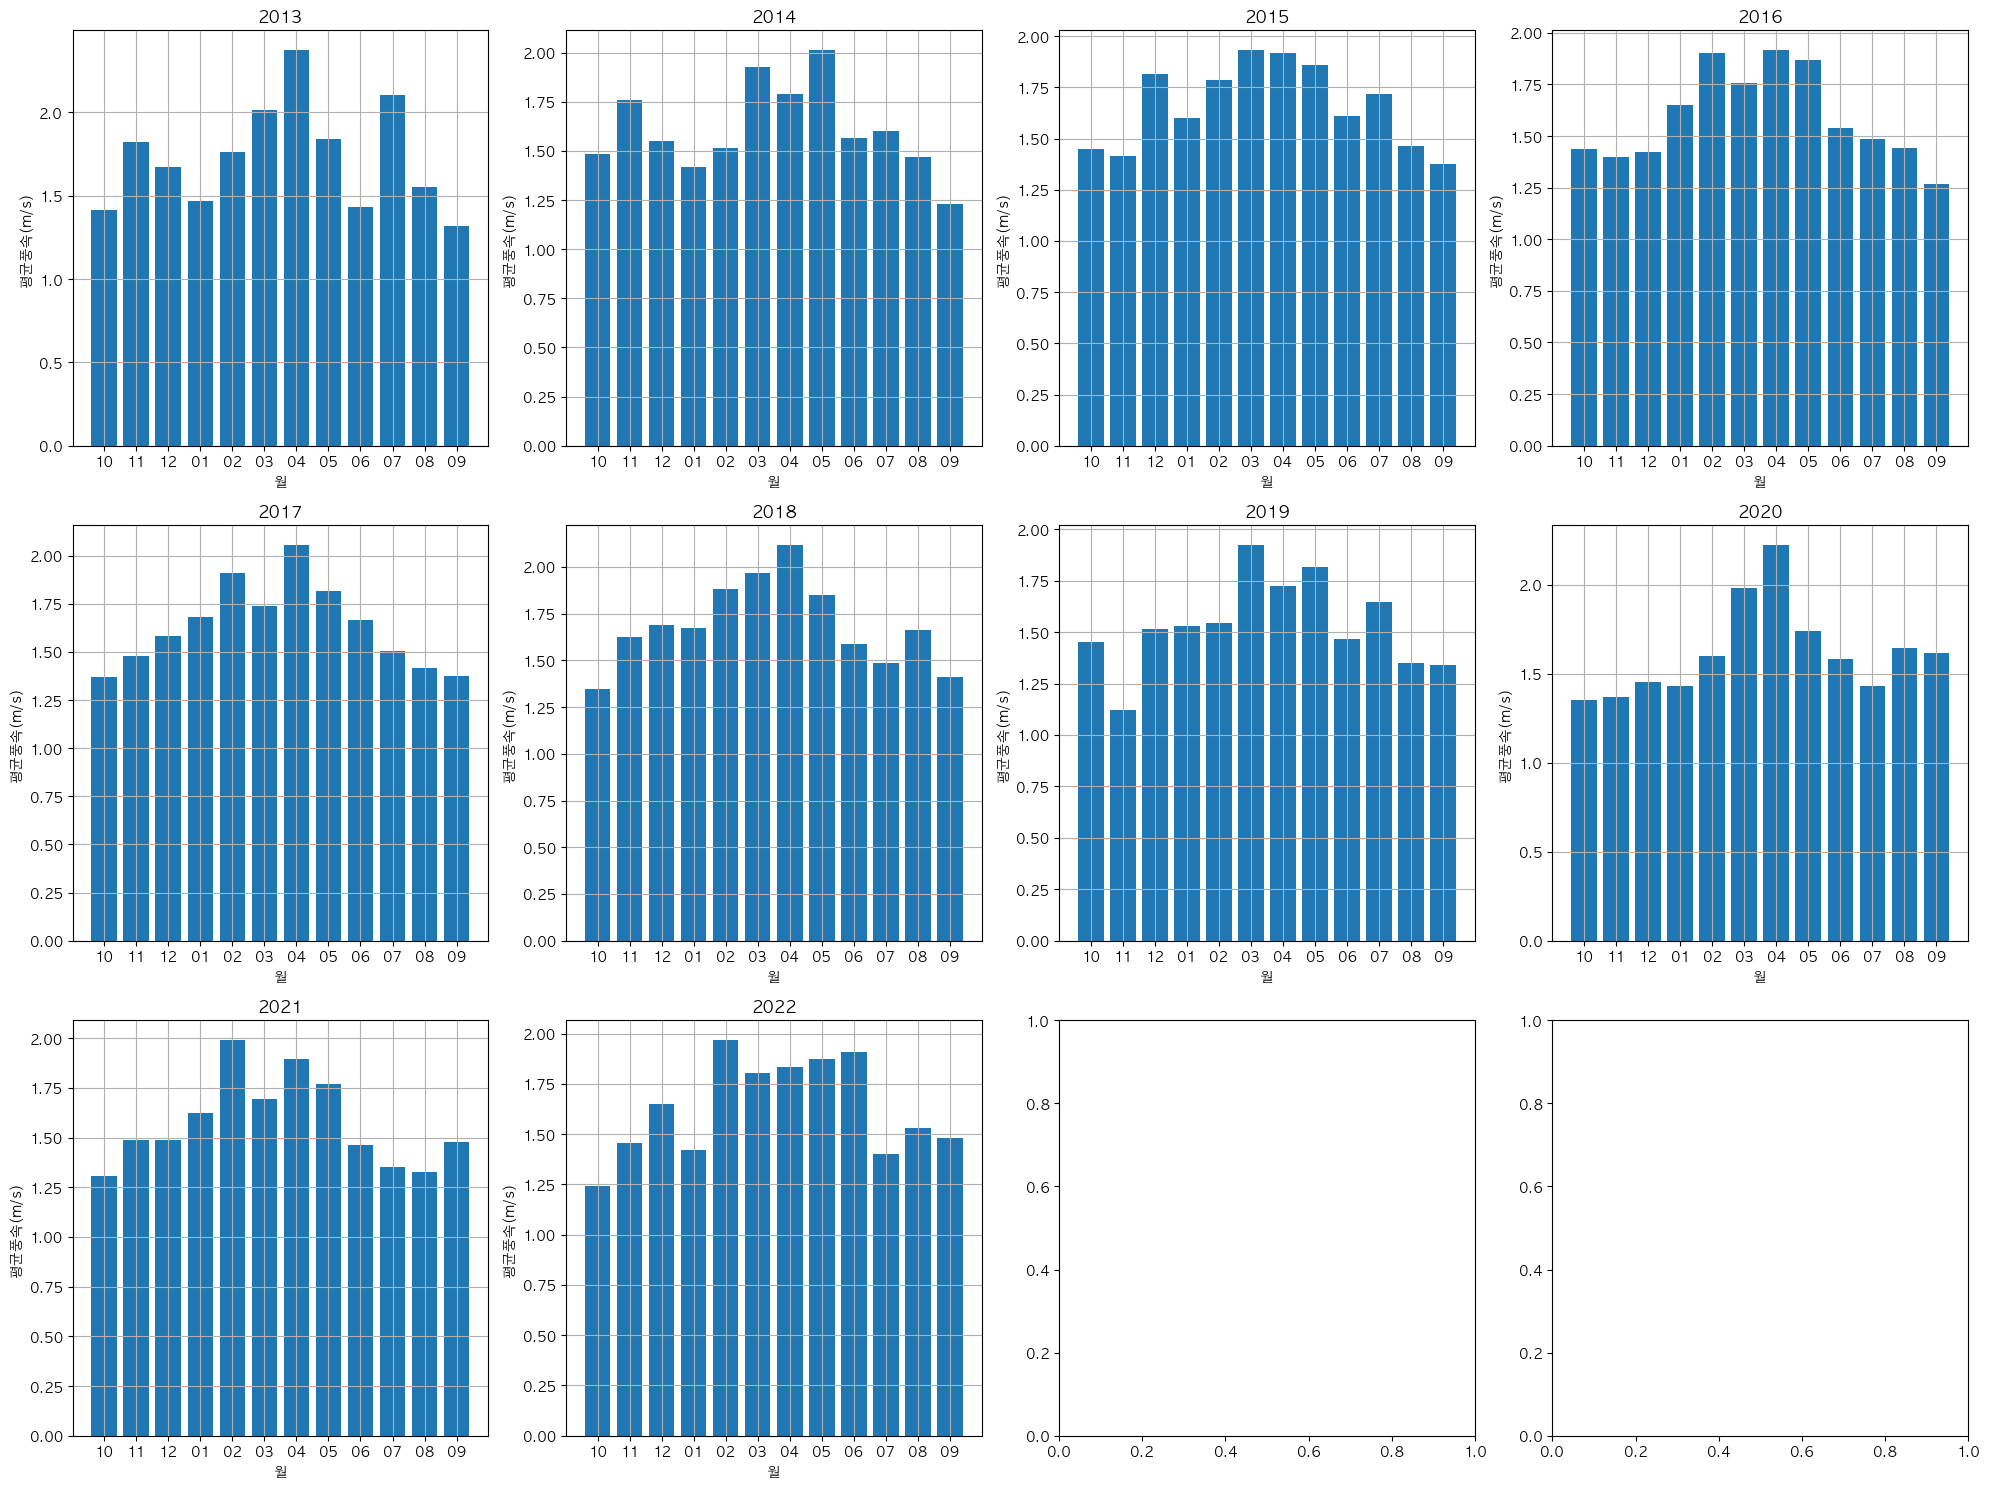

In [33]:
# 풍속 그룹화 후 계산
avg_wind = climates.groupby(['연도', '월'])['평균풍속(m/s)'].mean().reset_index()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, ax in enumerate(axes.flat):
    if i < len(avg_wind['연도'].unique()) - 1:  
        year = avg_wind['연도'].unique()[i + 1]  
        wind = avg_wind[(avg_wind['연도'] == str(int(year)-1)) & 
                                      (avg_wind['월'].isin(['10', '11', '12']))]
        wind = pd.concat([wind, 
                               avg_wind[(avg_wind['연도'] == year) & 
                                                (avg_wind['월'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09']))]])
        wind.sort_values(by=['연도', '월'], inplace=True)
        ax.bar(wind['월'], wind['평균풍속(m/s)'])
        ax.set_title(str(year))
        ax.set_xlabel('월')
        ax.set_ylabel('평균풍속(m/s)')
        ax.grid(True)

plt.tight_layout()
plt.show()


### 연도별 평균 합계 일조 시간

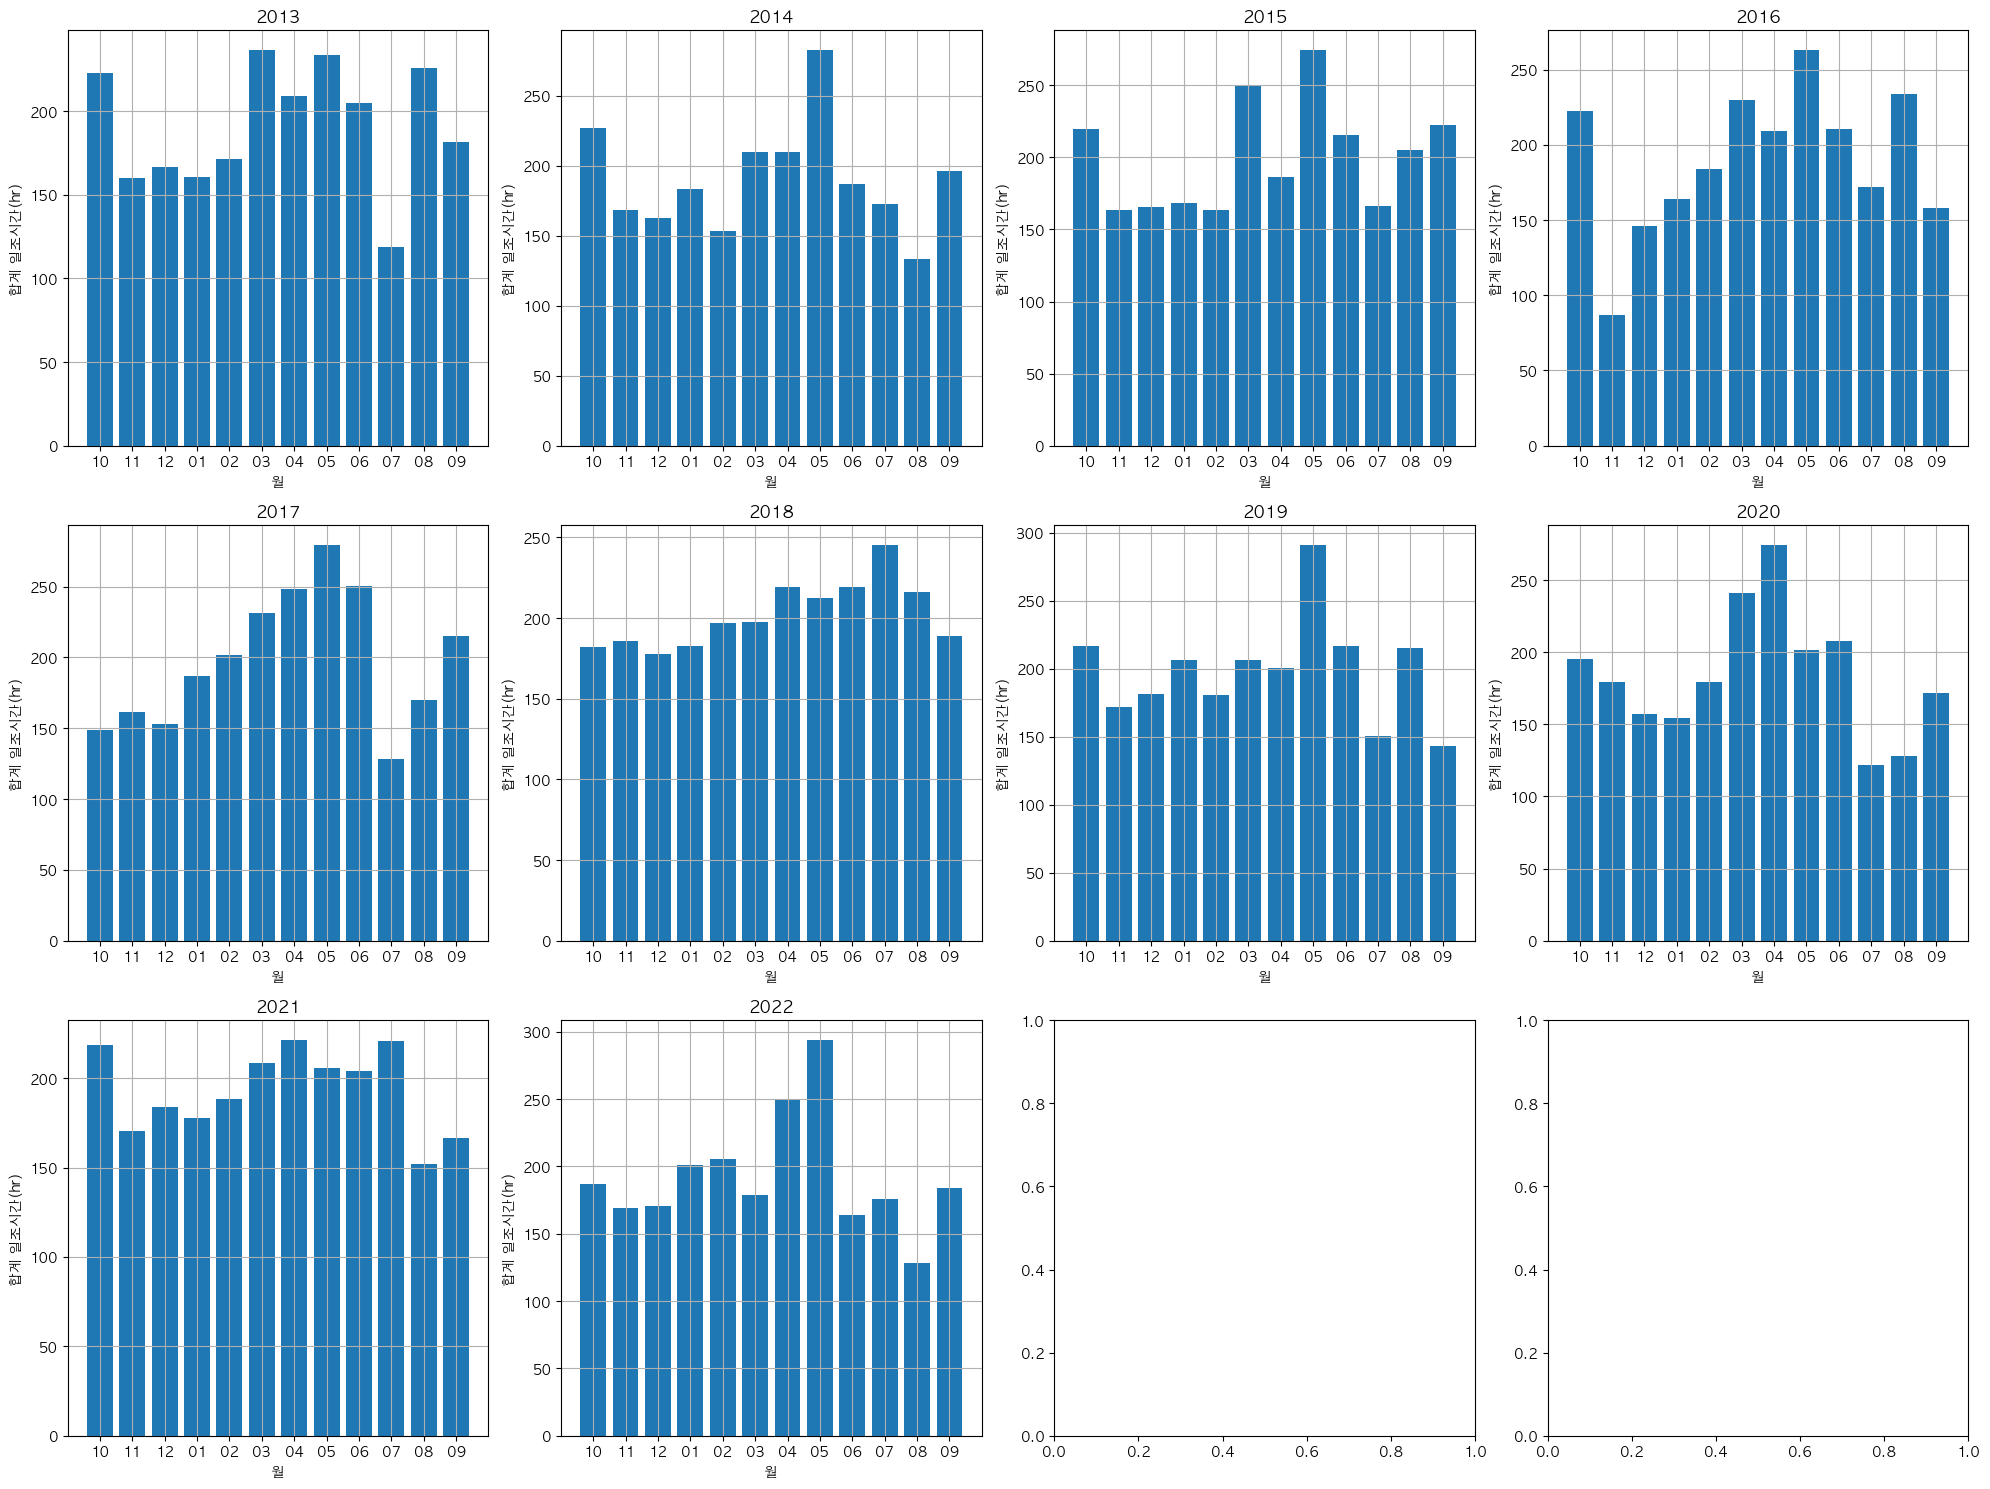

In [34]:
avg_sun = climates.groupby(['연도', '월'])['합계 일조시간(hr)'].mean().reset_index()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, ax in enumerate(axes.flat):
    if i < len(avg_sun['연도'].unique()) - 1:  
        year = avg_sun['연도'].unique()[i + 1]  
        sun = avg_sun[(avg_sun['연도'] == str(int(year)-1)) & 
                                      (avg_sun['월'].isin(['10', '11', '12']))]
        sun = pd.concat([sun, 
                               avg_sun[(avg_sun['연도'] == year) & 
                                                (avg_sun['월'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09']))]])
        wind.sort_values(by=['연도', '월'], inplace=True)
        ax.bar(sun['월'], sun['합계 일조시간(hr)'])
        ax.set_title(str(year))
        ax.set_xlabel('월')
        ax.set_ylabel('합계 일조시간(hr)')
        ax.grid(True)

plt.tight_layout()
plt.show()

### 연도별 평균지면온도(°C) 

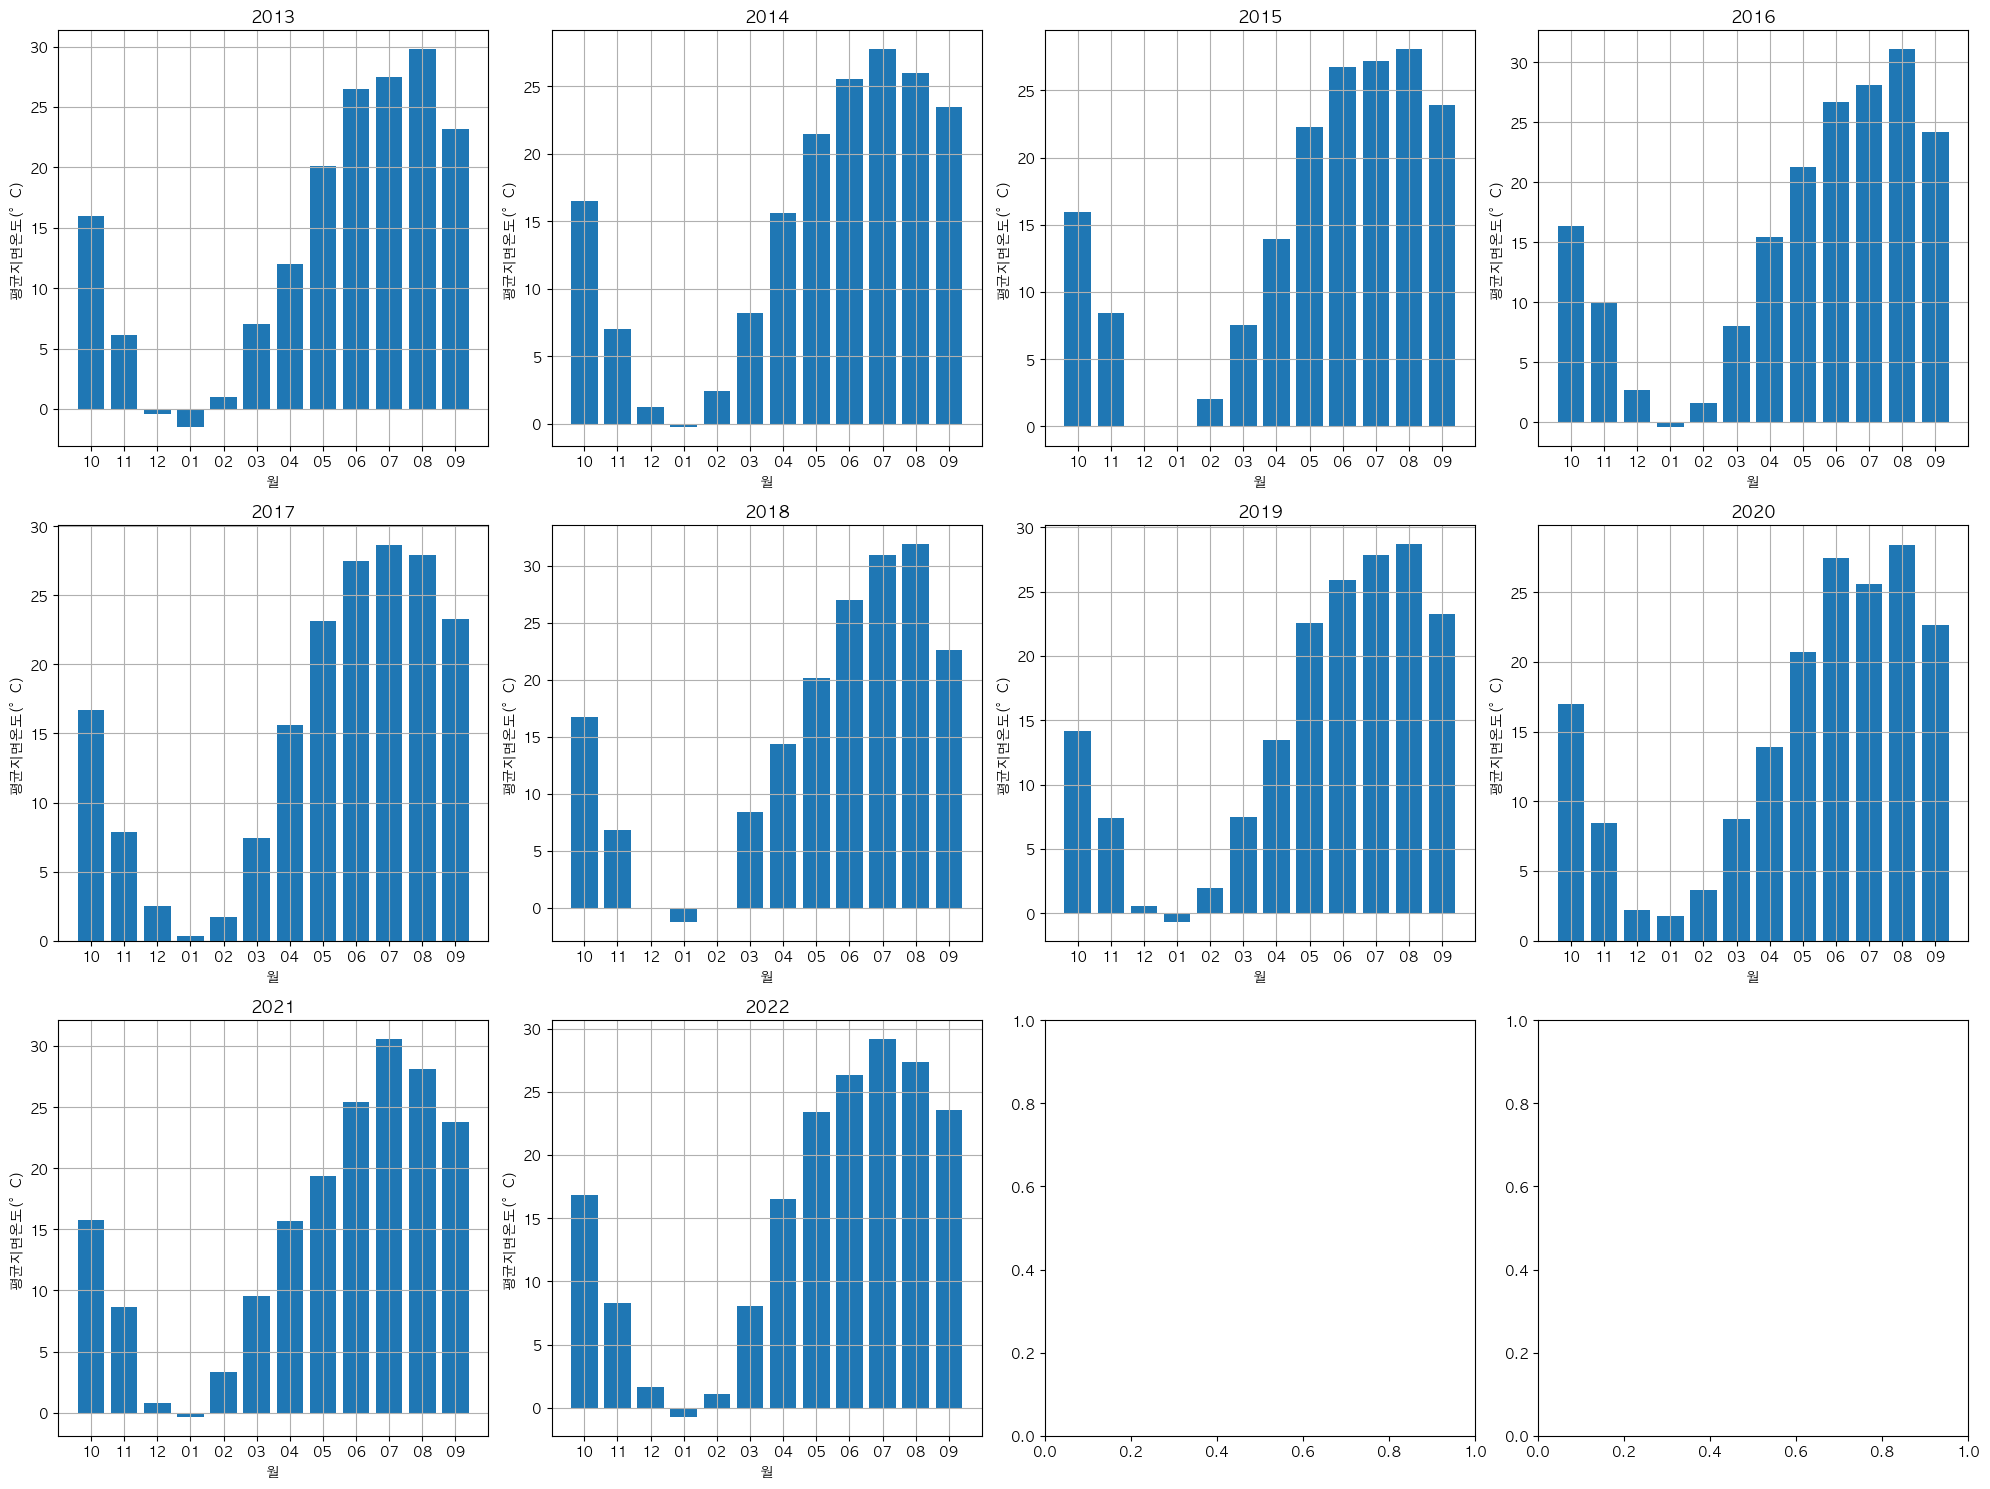

In [35]:
avg_gtemp = climates.groupby(['연도', '월'])['평균지면온도(°C)'].mean().reset_index()

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, ax in enumerate(axes.flat):
    if i < len(avg_gtemp['연도'].unique()) - 1:  
        year = avg_gtemp['연도'].unique()[i + 1]  
        gtemp = avg_gtemp[(avg_gtemp['연도'] == str(int(year)-1)) & 
                                      (avg_gtemp['월'].isin(['10', '11', '12']))]
        gtemp = pd.concat([gtemp, 
                               avg_gtemp[(avg_gtemp['연도'] == year) & 
                                                (avg_sun['월'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09']))]])
        wind.sort_values(by=['연도', '월'], inplace=True)
        ax.bar(sun['월'], gtemp['평균지면온도(°C)'])
        ax.set_title(str(year))
        ax.set_xlabel('월')
        ax.set_ylabel('평균지면온도(°C)')
        ax.grid(True)

plt.tight_layout()
plt.show()

### 상관관계 분석

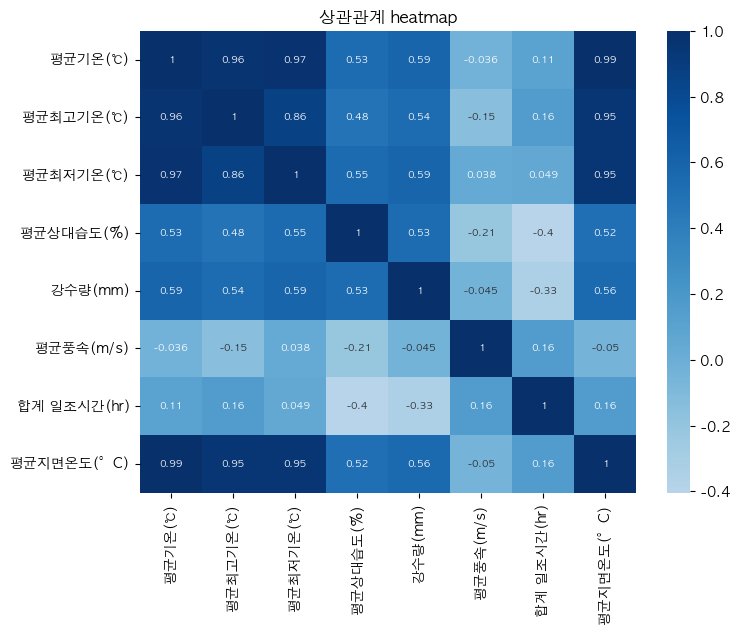

In [36]:
#날짜 열 제거
climates_numeric = climates.drop(columns=['지역코드','일시','연도','월'])
corr = climates_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', center=0, annot_kws={'size': 7})
plt.title('상관관계 heatmap')
plt.show()

In [37]:
# 상관관계 행렬에서 상관관계의 절대값이 0.6 이상인 값을 뽑아내기
high_correlation = corr[(np.abs(corr) >= 0.7) & (corr != 1)]

high_correlation

,평균기온(℃),평균최고기온(℃),평균최저기온(℃),평균상대습도(%),강수량(mm),평균풍속(m/s),합계 일조시간(hr),평균지면온도(°C)
평균기온(℃),NaN,0.959714,0.967404,NaN,NaN,NaN,NaN,0.990161
평균최고기온(℃),0.959714,NaN,0.859821,NaN,NaN,NaN,NaN,0.954851
평균최저기온(℃),0.967404,0.859821,NaN,NaN,NaN,NaN,NaN,0.954228
평균상대습도(%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강수량(mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
평균풍속(m/s),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
합계 일조시간(hr),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
평균지면온도(°C),0.990161,0.954851,0.954228,NaN,NaN,NaN,NaN,NaN


평균 기온과 평균 최고 & 최저 기온은 강한 상관 관계 존재
평균 기온과 평균 지면온도 역시 강한 상관관계 존재
평균최고&최저 기온 역시 평균 지면 온도와 강한 상관 관계 존재
나머지 변수끼리는 강한 상관관계가 있다고 판단할 수 없음

# x 변수의 이상치 확인 및 처리

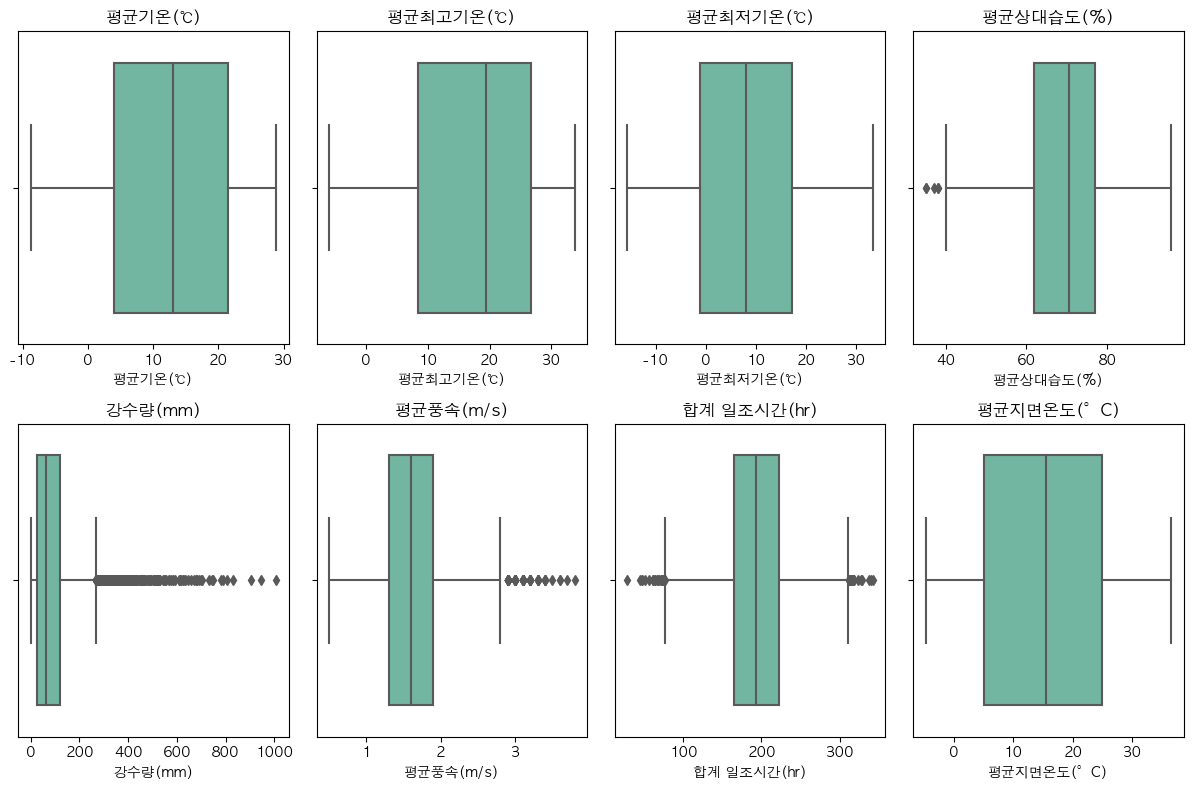

In [42]:
# 변수 별로 박스 플롯 그리기
plt.figure(figsize=(12, 8))

# 평균기온(℃)
plt.subplot(2, 4, 1)
sns.boxplot(x=climates['평균기온(℃)'], palette='Set2')
plt.title('평균기온(℃)')

# 평균최고기온(℃)
plt.subplot(2, 4, 2)
sns.boxplot(x=climates['평균최고기온(℃)'], palette='Set2')
plt.title('평균최고기온(℃)')

# 평균최저기온(℃)
plt.subplot(2, 4, 3)
sns.boxplot(x=climates['평균최저기온(℃)'], palette='Set2')
plt.title('평균최저기온(℃)')

# 평균상대습도(%)
plt.subplot(2, 4, 4)
sns.boxplot(x=climates['평균상대습도(%)'], palette='Set2')
plt.title('평균상대습도(%)')

# 강수량(mm)
plt.subplot(2, 4, 5)
sns.boxplot(x=climates['강수량(mm)'], palette='Set2')
plt.title('강수량(mm)')

# 평균풍속(m/s)
plt.subplot(2, 4, 6)
sns.boxplot(x=climates['평균풍속(m/s)'], palette='Set2')
plt.title('평균풍속(m/s)')

# 합계 일조시간(hr)
plt.subplot(2, 4, 7)
sns.boxplot(x=climates['합계 일조시간(hr)'], palette='Set2')
plt.title('합계 일조시간(hr)')

# 평균지면온도(°C)
plt.subplot(2, 4, 8)
sns.boxplot(x=climates['평균지면온도(°C)'], palette='Set2')
plt.title('평균지면온도(°C)')

plt.tight_layout()
plt.show()


/Users/nawon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


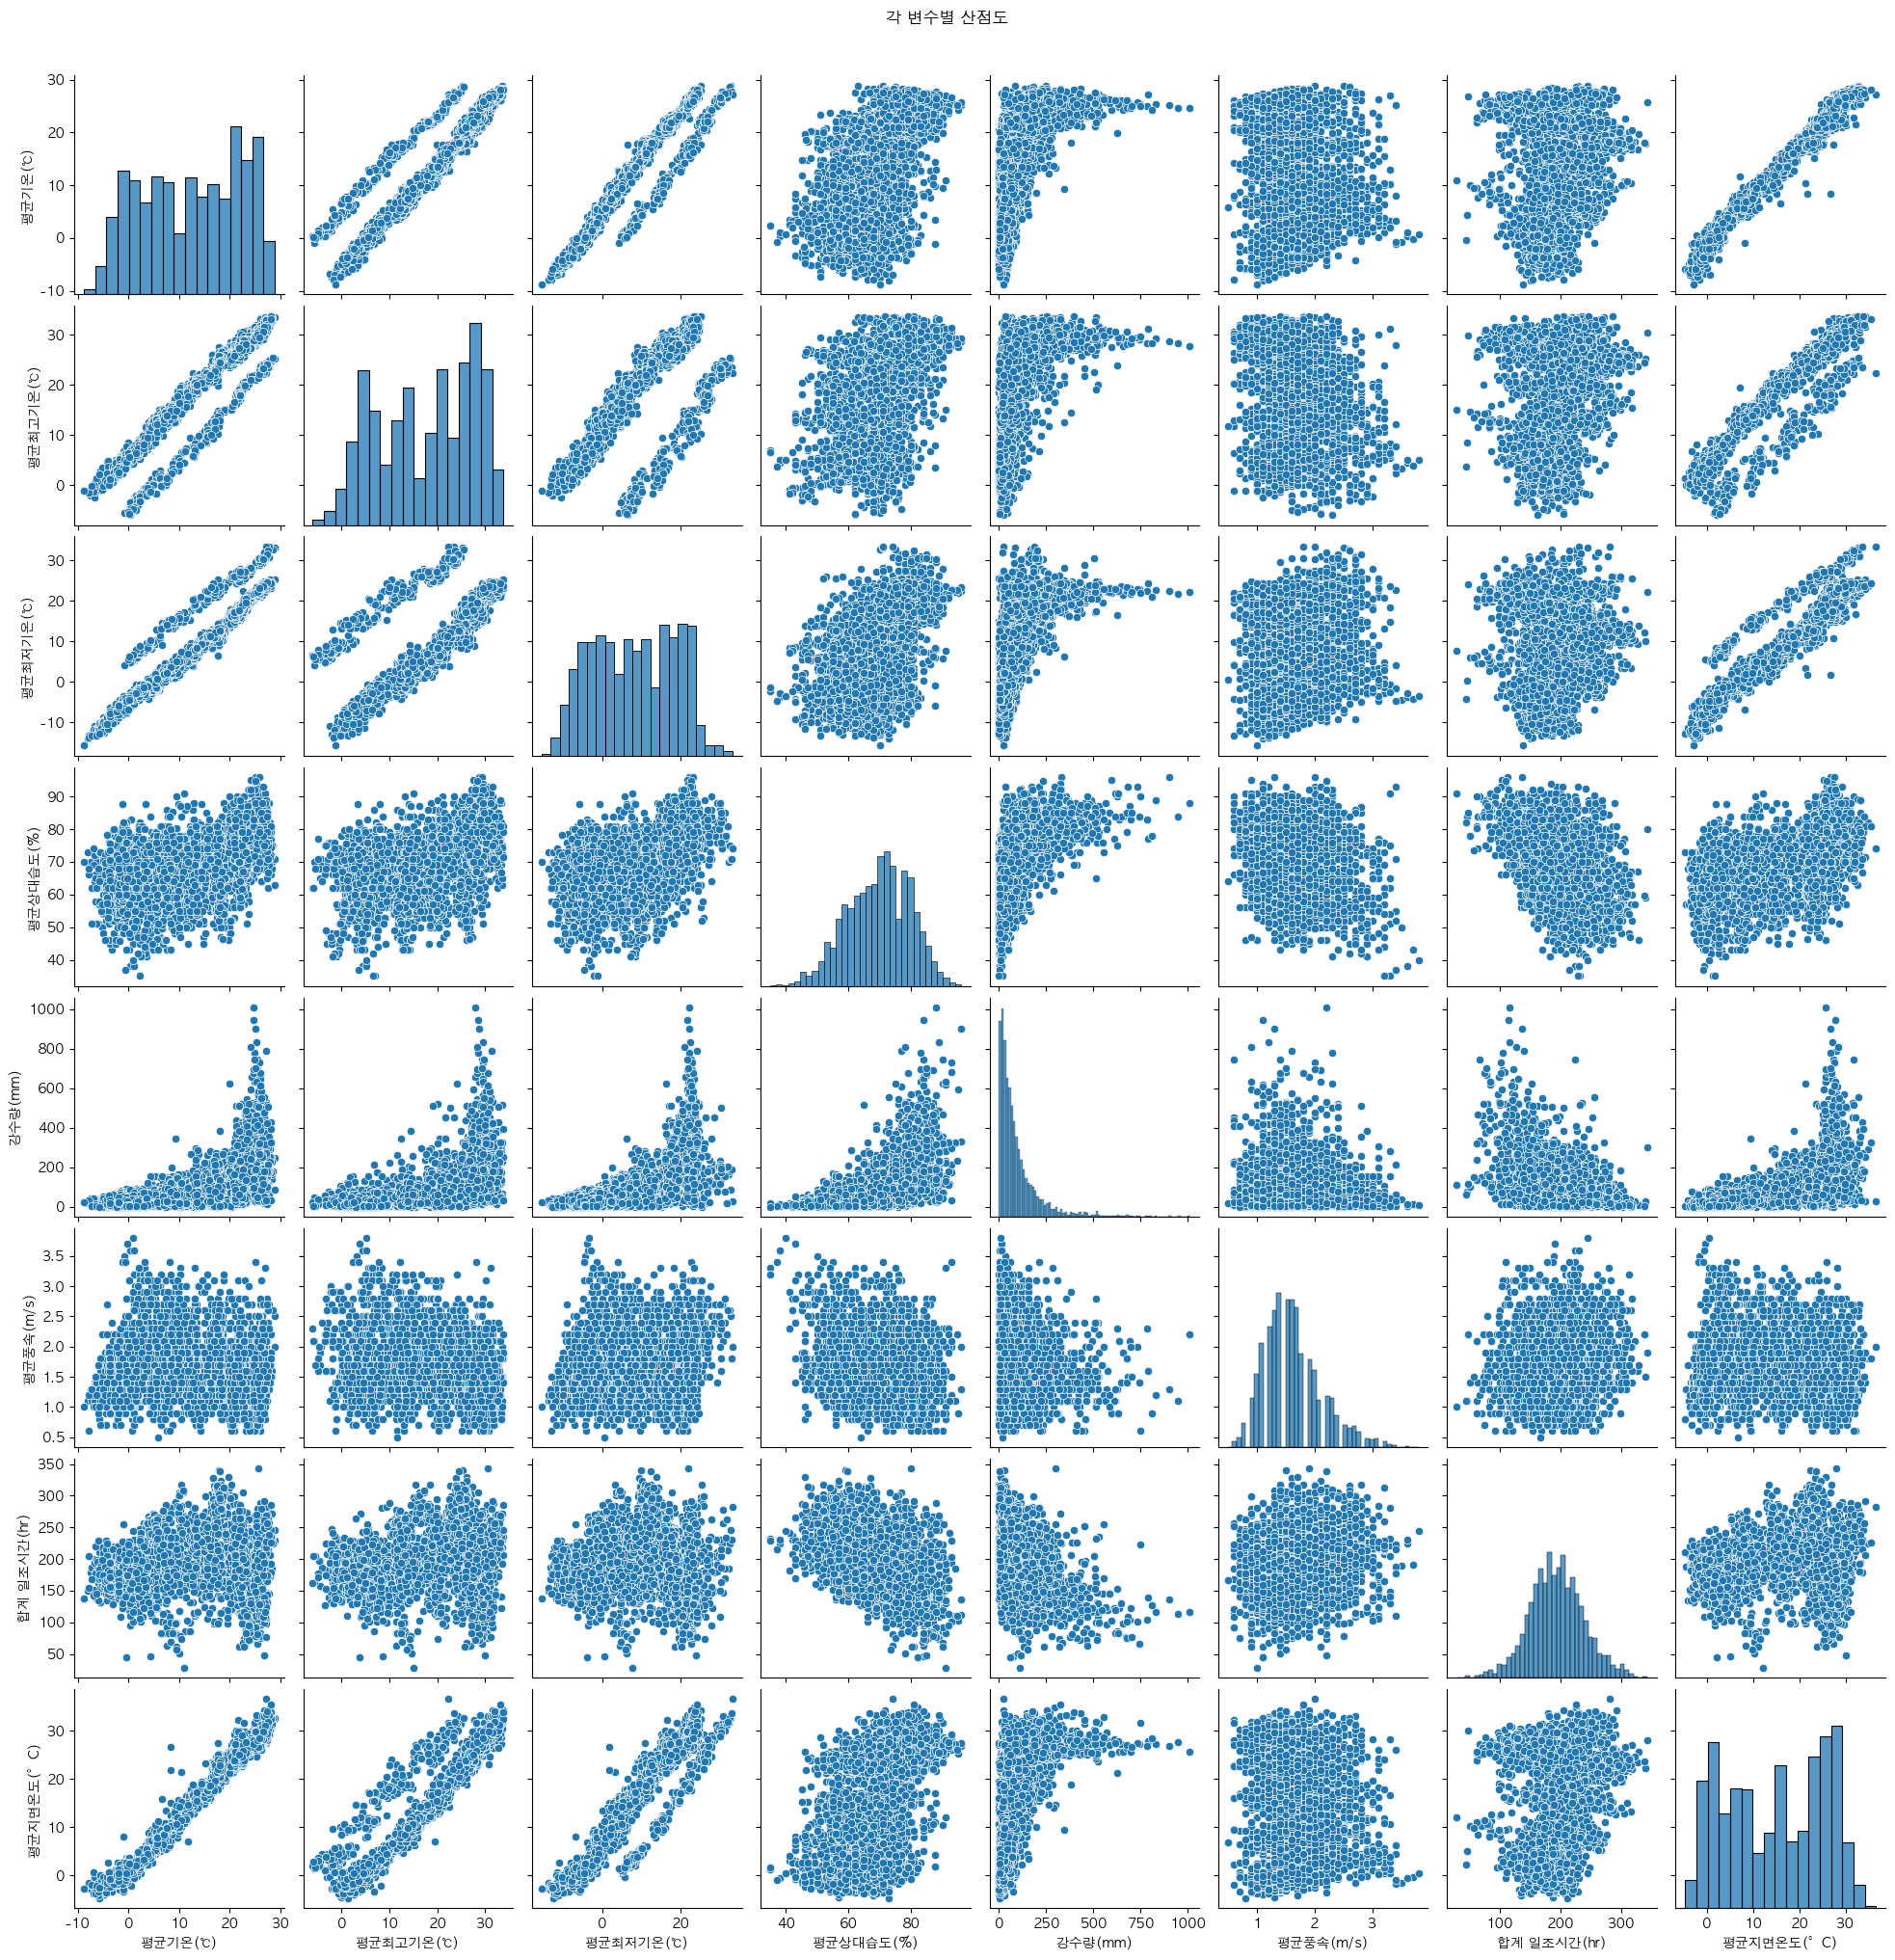

In [45]:
# 변수들 간의 산점도 그리기
sns.pairplot(climates)
plt.suptitle('각 변수별 산점도', y=1.02)
plt.show()

박스 플랏과 산점도를 보았을 때 이상치처럼 보이는 것이 존재하나 기상데이터라는 특성을 고려
이상치가 실제로 관찰 가능한 현상이고 분석 목적에 유용한 정보를 제공하는 경우에는 이상치를 그대로 유지하는 것이 바람직할 수 있기 때문에 이상치를 제거하지 않는 것이 좋다고 생각됩니다..-> 의견이 필요합니다...

+ 변수 선택의 경우에는 다중회귀분석의 단계선택법을 이용했다고 논문에 나와있는데 이건 공간 패널 모형의 회귀분석에 대해 조금 더 공부해보고 일반적인 회귀분석에서이 단계선택법을 활용해도 좋을지 혹은 다른 방법을 사용하는지 확인한 후 하는 것이 좋을 것 같습니다 :) => 화요일까지 참고할 수 있는 자료와 방법을 알아보고 공유하도록 하겠습니다 :)